In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

#make matplotlib plots included inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#set a default seaborn style
sns.set_style('whitegrid')

# Data Preview

Preview data to check column types and check for any missing values. 

In [2]:
#read in table
payments = pd.read_csv('/home/amybirdee/hobby_projects/Manual/payments.csv', delimiter = ',')

In [3]:
payments.head()

PAYMENT_ID                          ORDER_ID  \
0  5f941ee9d432e26351becc7036ffbdb6  97dd53ee36e592b5b4a99b7dae8f8f0d   
1  f3e55befc8f93c47d53d02a66e00bd85  9f6a977e674811541fce32ba4fa0afa5   
2  ea067b8acb989ac75412042afc68972c  9f6a977e674811541fce32ba4fa0afa5   
3  e7532a7b68b49c08e9c86509d89364da  9f6a977e674811541fce32ba4fa0afa5   
4  b5da6658ae573b23b17e51527214fbfa  9f6a977e674811541fce32ba4fa0afa5   

            CREATED_AT  IS_FAILED  IS_COMPLETED  IS_CANCELLED CURRENCY_CODE  \
0  2023-06-22 13:23:51      False          True         False           BRL   
1  2023-06-01 05:10:24       True         False         False           BRL   
2  2023-06-01 05:13:50       True         False         False           BRL   
3  2023-06-02 06:03:13       True         False         False           BRL   
4  2023-06-03 06:03:16       True         False         False           BRL   

  PAYMENT_STATE  FAILURE_REASON REFUSAL_REASON DETAILED_REFUSAL_REASON  \
0     completed             NaN            NaN                     NaN   
1        failed  Payment failed        Refused             82 : Policy   
2        failed  Payment failed        Refused             82 : Policy   
3        failed  Payment failed        Refused             82 : Policy   
4        failed  Payment failed        Refused             82 : Policy   

   ORDER_PAYMENT_RANK  PAYMENT_AMOUNT_LOCAL             CARD_ISSUING_BANK  
0                   1                225.12  BANCO COOPERATIVO SICREDI SA  
1                   1                439.00              NU PAGAMENTOS SA  
2                   2                439.00              NU PAGAMENTOS SA  
3                   3                439.00              NU PAGAMENTOS SA  
4                   4                439.00              NU PAGAMENTOS SA

In [4]:
#check data types - need to change created at to date format
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422204 entries, 0 to 422203
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PAYMENT_ID               422204 non-null  object 
 1   ORDER_ID                 422204 non-null  object 
 2   CREATED_AT               422204 non-null  object 
 3   IS_FAILED                422204 non-null  bool   
 4   IS_COMPLETED             422204 non-null  bool   
 5   IS_CANCELLED             422204 non-null  bool   
 6   CURRENCY_CODE            422204 non-null  object 
 7   PAYMENT_STATE            422204 non-null  object 
 8   FAILURE_REASON           269516 non-null  object 
 9   REFUSAL_REASON           269187 non-null  object 
 10  DETAILED_REFUSAL_REASON  254514 non-null  object 
 11  ORDER_PAYMENT_RANK       422204 non-null  int64  
 12  PAYMENT_AMOUNT_LOCAL     422204 non-null  float64
 13  CARD_ISSUING_BANK        381019 non-null  object 
dtypes: b

In [5]:
#convert date columns to datetime and add a week and month column
payments['CREATED_AT'] = pd.to_datetime(payments['CREATED_AT'])
payments['PAYMENT_DATE'] = payments['CREATED_AT'].dt.strftime('%Y-%m-%d')
payments['PAYMENT_WEEK_START'] = payments['CREATED_AT'].dt.to_period('W').dt.start_time.apply(lambda x: x.strftime('%Y-%m-%d'))
payments['PAYMENT_MONTH'] = payments['CREATED_AT'].dt.strftime('%Y-%m')

# Functions

In [6]:
#define function to set figure size
def figure_size (width, height):
    plt.rcParams['figure.figsize'] = (width, height)

In [7]:
#define function for bar chart

def bar_chart(i, x, y, formatter, lim, labels, rotation, xlabel, ylabel, title):
    ax = plt.subplot(i)
    
    #plot bars
    plt.bar(x, y, color = '#0A3C3B')
   
    #change y axis format
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylim(lim)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = rotation, fontsize = 12)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_title(title, fontsize = 14)

In [8]:
#define function to plot line charts
def line_chart(i, x, y, formatter, rotation, ylabel, title):
    ax = plt.subplot(i)
    
    plt.plot(x, y, color = '#0A3C3B', linewidth = 2)
    
    #change axis format
    ax.yaxis.set_major_formatter(formatter)
    
    #set frequency of dates on x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
    #add labels
    ax.tick_params(axis = 'x', labelrotation = rotation)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_title(title, fontsize = 14)
    
    plt.show()

# Revenue

In [9]:
#create dataframe where payments were successful
successful_orders = payments[payments['PAYMENT_STATE'] =='completed']

In [10]:
#group dataframe by month for chart
successful_orders_monthly = successful_orders.groupby('PAYMENT_MONTH').agg({'PAYMENT_AMOUNT_LOCAL': \
                                                                            ['sum','count']}).reset_index()

#get columns titles on one line
successful_orders_monthly.columns = successful_orders_monthly.columns.map(' | '.join).str.strip(' | ')

#convert revenue column into millions
successful_orders_monthly['Revenue (millions)'] = (successful_orders_monthly['PAYMENT_AMOUNT_LOCAL | sum'] / 1000000)

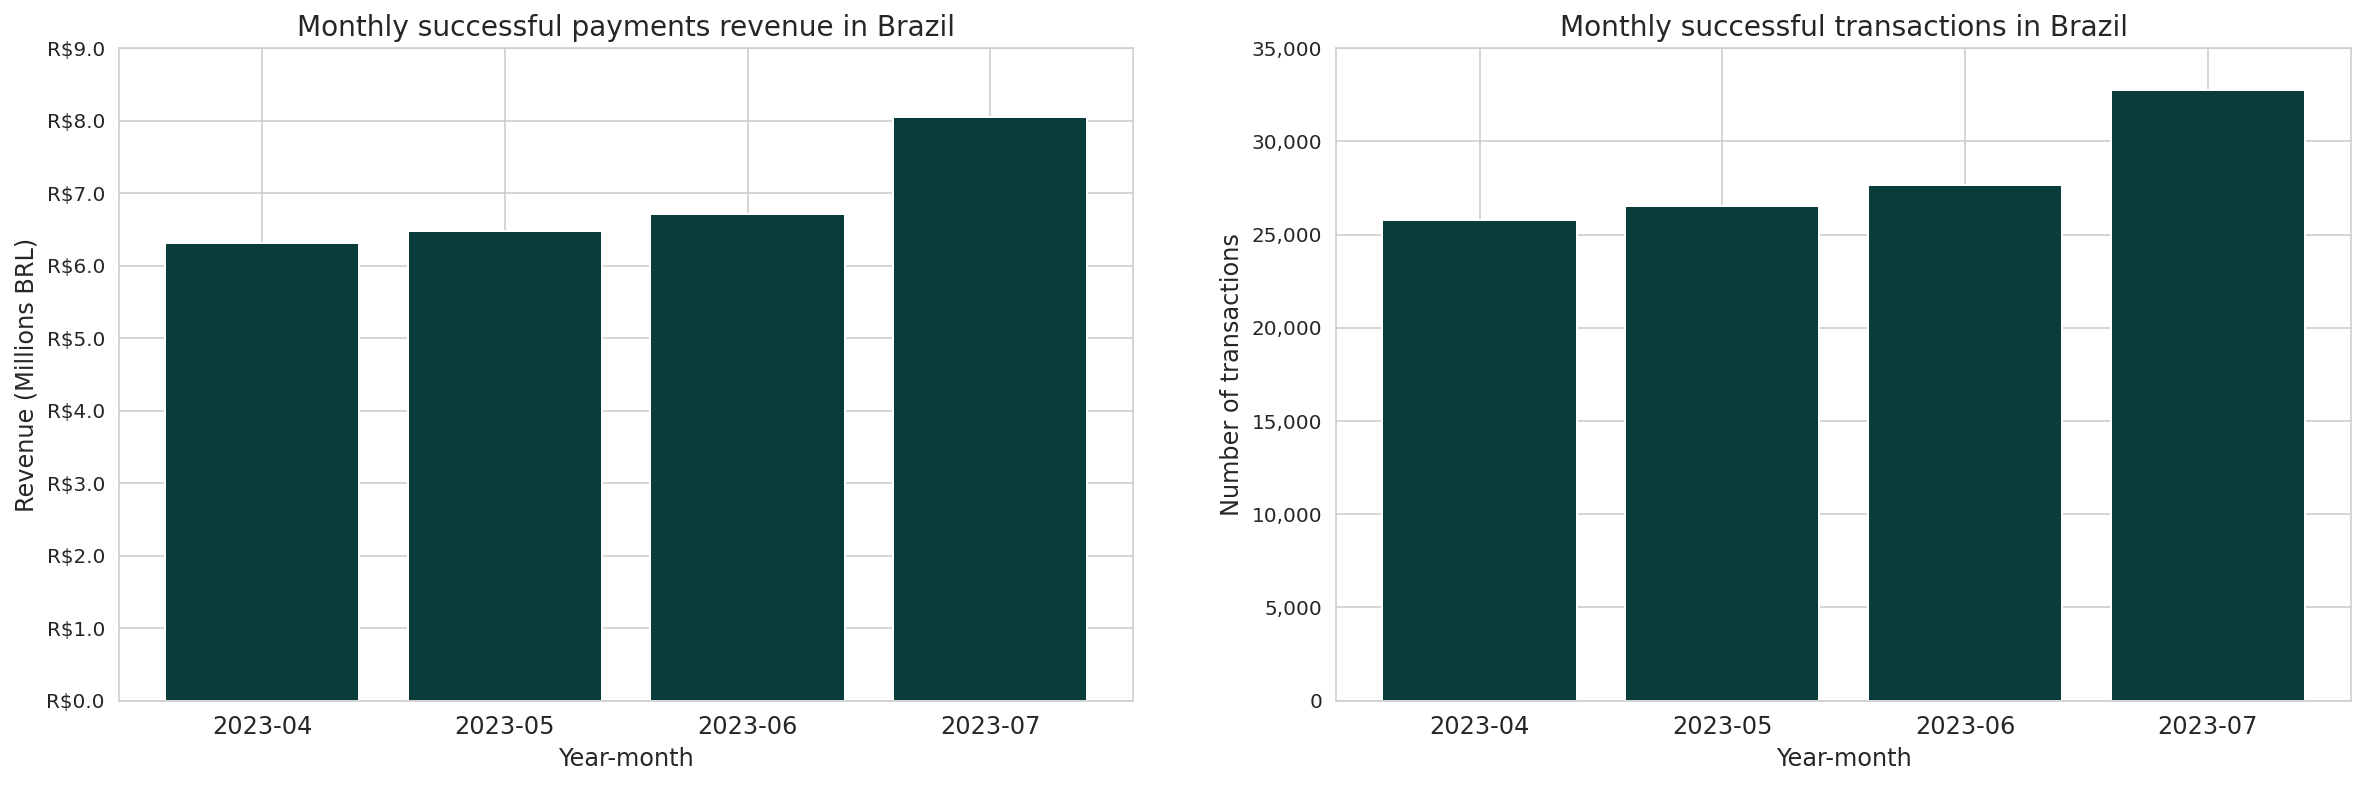

In [11]:
#apply functions for chart
figure_size(20, 6)

bar_chart((121), successful_orders_monthly['PAYMENT_MONTH'], successful_orders_monthly['Revenue (millions)'], 
          tcr.StrMethodFormatter('R${x:,.1f}'), (0, 9), successful_orders_monthly['PAYMENT_MONTH'], 
          None, 'Year-month', 'Revenue (Millions BRL)', 
          'Monthly successful payments revenue in Brazil')

bar_chart((122), successful_orders_monthly['PAYMENT_MONTH'], 
          successful_orders_monthly['PAYMENT_AMOUNT_LOCAL | count'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 35000), successful_orders_monthly['PAYMENT_MONTH'], 
          None, 'Year-month', 'Number of transactions', 
          'Monthly successful transactions in Brazil')

In [12]:
#group dataframe by week for chart
successful_orders_weekly = successful_orders.groupby('PAYMENT_WEEK_START').agg({'PAYMENT_AMOUNT_LOCAL': \
                                                                                 ['sum','count']}).reset_index()

#get columns titles on one line
successful_orders_weekly.columns = successful_orders_weekly.columns.map(' | '.join).str.strip(' | ')

#convert revenue column into millions
successful_orders_weekly['Revenue (millions)'] = (successful_orders_weekly['PAYMENT_AMOUNT_LOCAL | sum'] / 1000000)

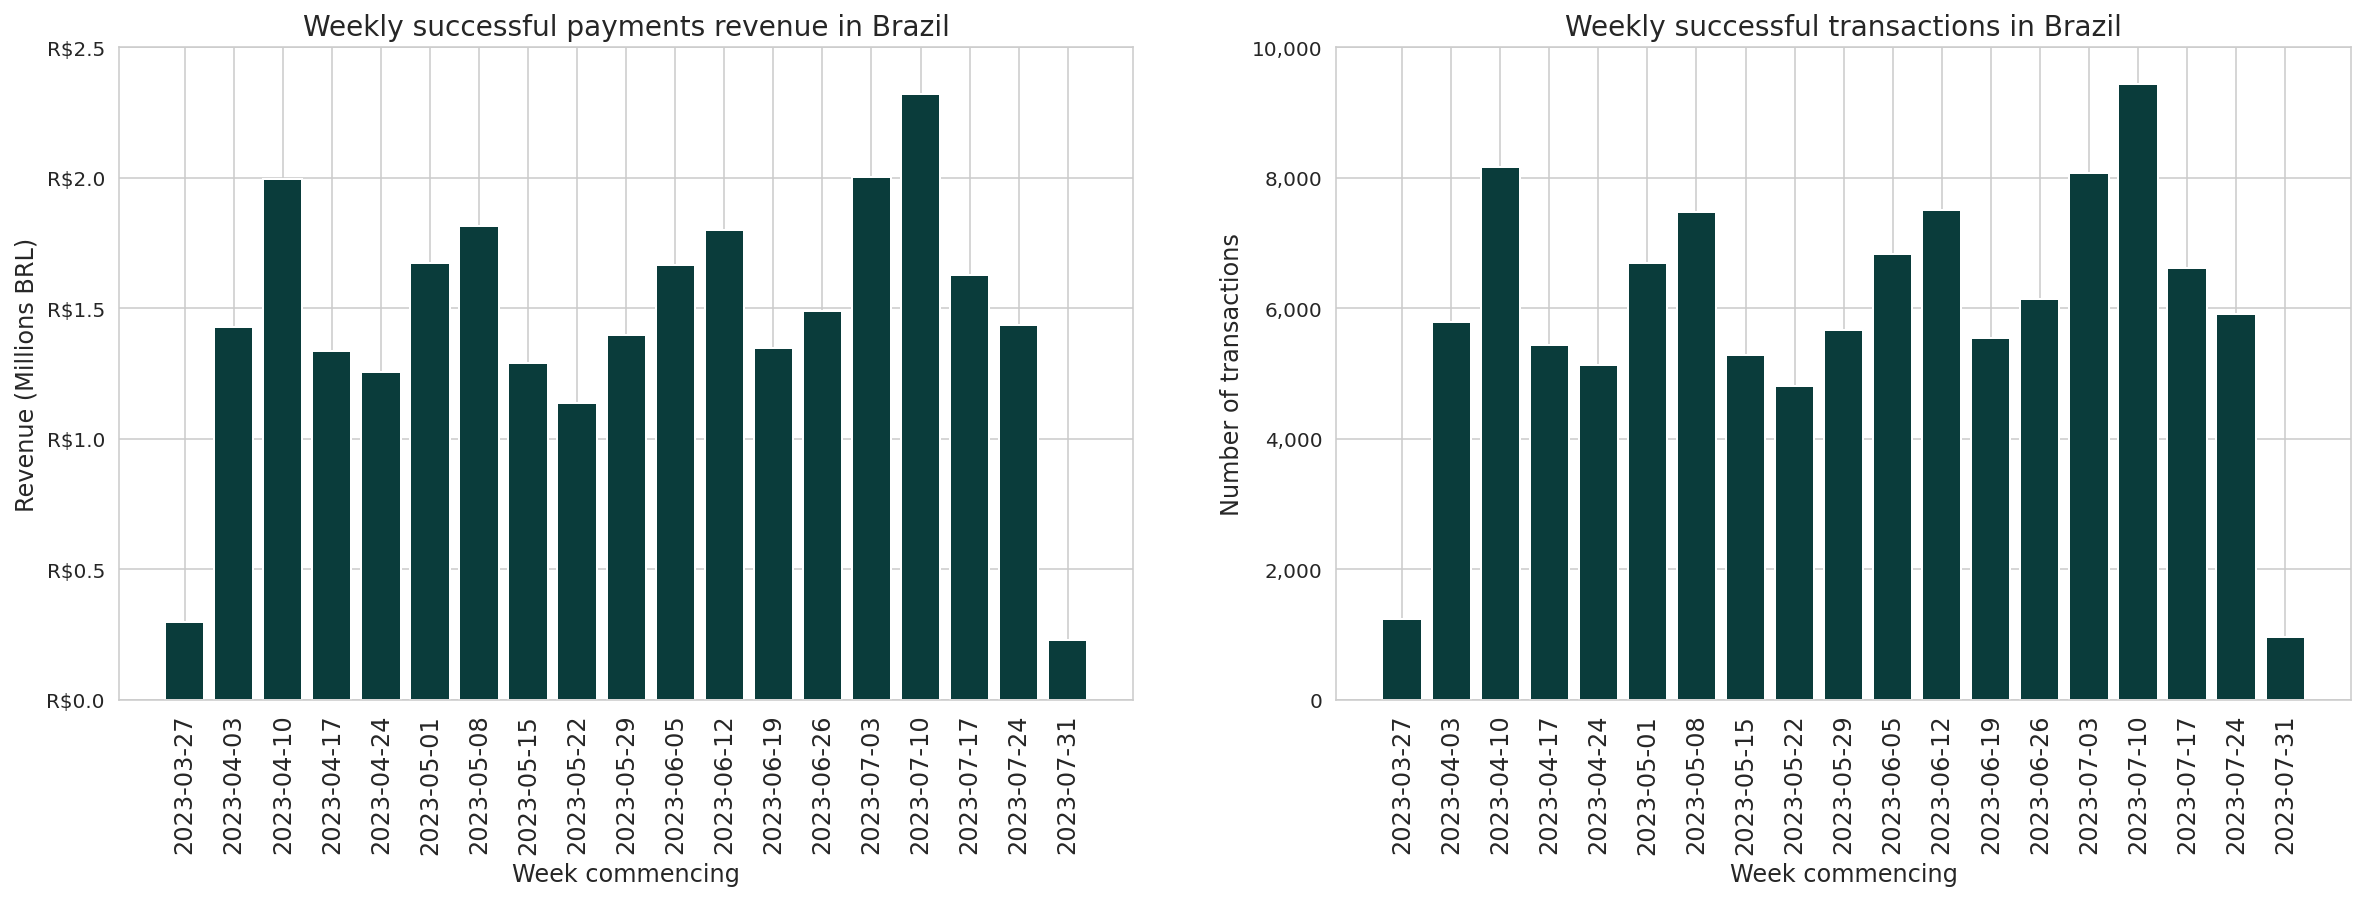

In [13]:
#apply functions for chart
figure_size(20, 6)

bar_chart((121), successful_orders_weekly['PAYMENT_WEEK_START'], 
          successful_orders_weekly['Revenue (millions)'], tcr.StrMethodFormatter('R${x:,.1f}'), (0, 2.5), 
          successful_orders_weekly['PAYMENT_WEEK_START'], 90, 'Week commencing', 'Revenue (Millions BRL)', 
          'Weekly successful payments revenue in Brazil')

bar_chart((122), successful_orders_weekly['PAYMENT_WEEK_START'], 
          successful_orders_weekly['PAYMENT_AMOUNT_LOCAL | count'], tcr.StrMethodFormatter('{x:,.0f}'), 
          (0, 10000), successful_orders_weekly['PAYMENT_WEEK_START'], 90, 'Week commencing', 
          'Number of transactions', 'Weekly successful transactions in Brazil')

In [14]:
#find average monthly revenue per successful order
avg_revenue_monthly = successful_orders.groupby('PAYMENT_MONTH').agg({'PAYMENT_AMOUNT_LOCAL': 'sum',
                                                                  'ORDER_ID': 'count'}).reset_index()

#add column for average revenue per order
avg_revenue_monthly['AVG_REV_PER_ORDER'] = avg_revenue_monthly['PAYMENT_AMOUNT_LOCAL'] / avg_revenue_monthly['ORDER_ID']

In [15]:
#find average weekly revenue per successful order
avg_revenue_weekly = successful_orders.groupby('PAYMENT_WEEK_START').agg({'PAYMENT_AMOUNT_LOCAL': 'sum',
                                                                  'ORDER_ID': 'count'}).reset_index()

#add column for average revenue per order
avg_revenue_weekly['AVG_REV_PER_ORDER'] = avg_revenue_weekly['PAYMENT_AMOUNT_LOCAL'] / avg_revenue_weekly['ORDER_ID']

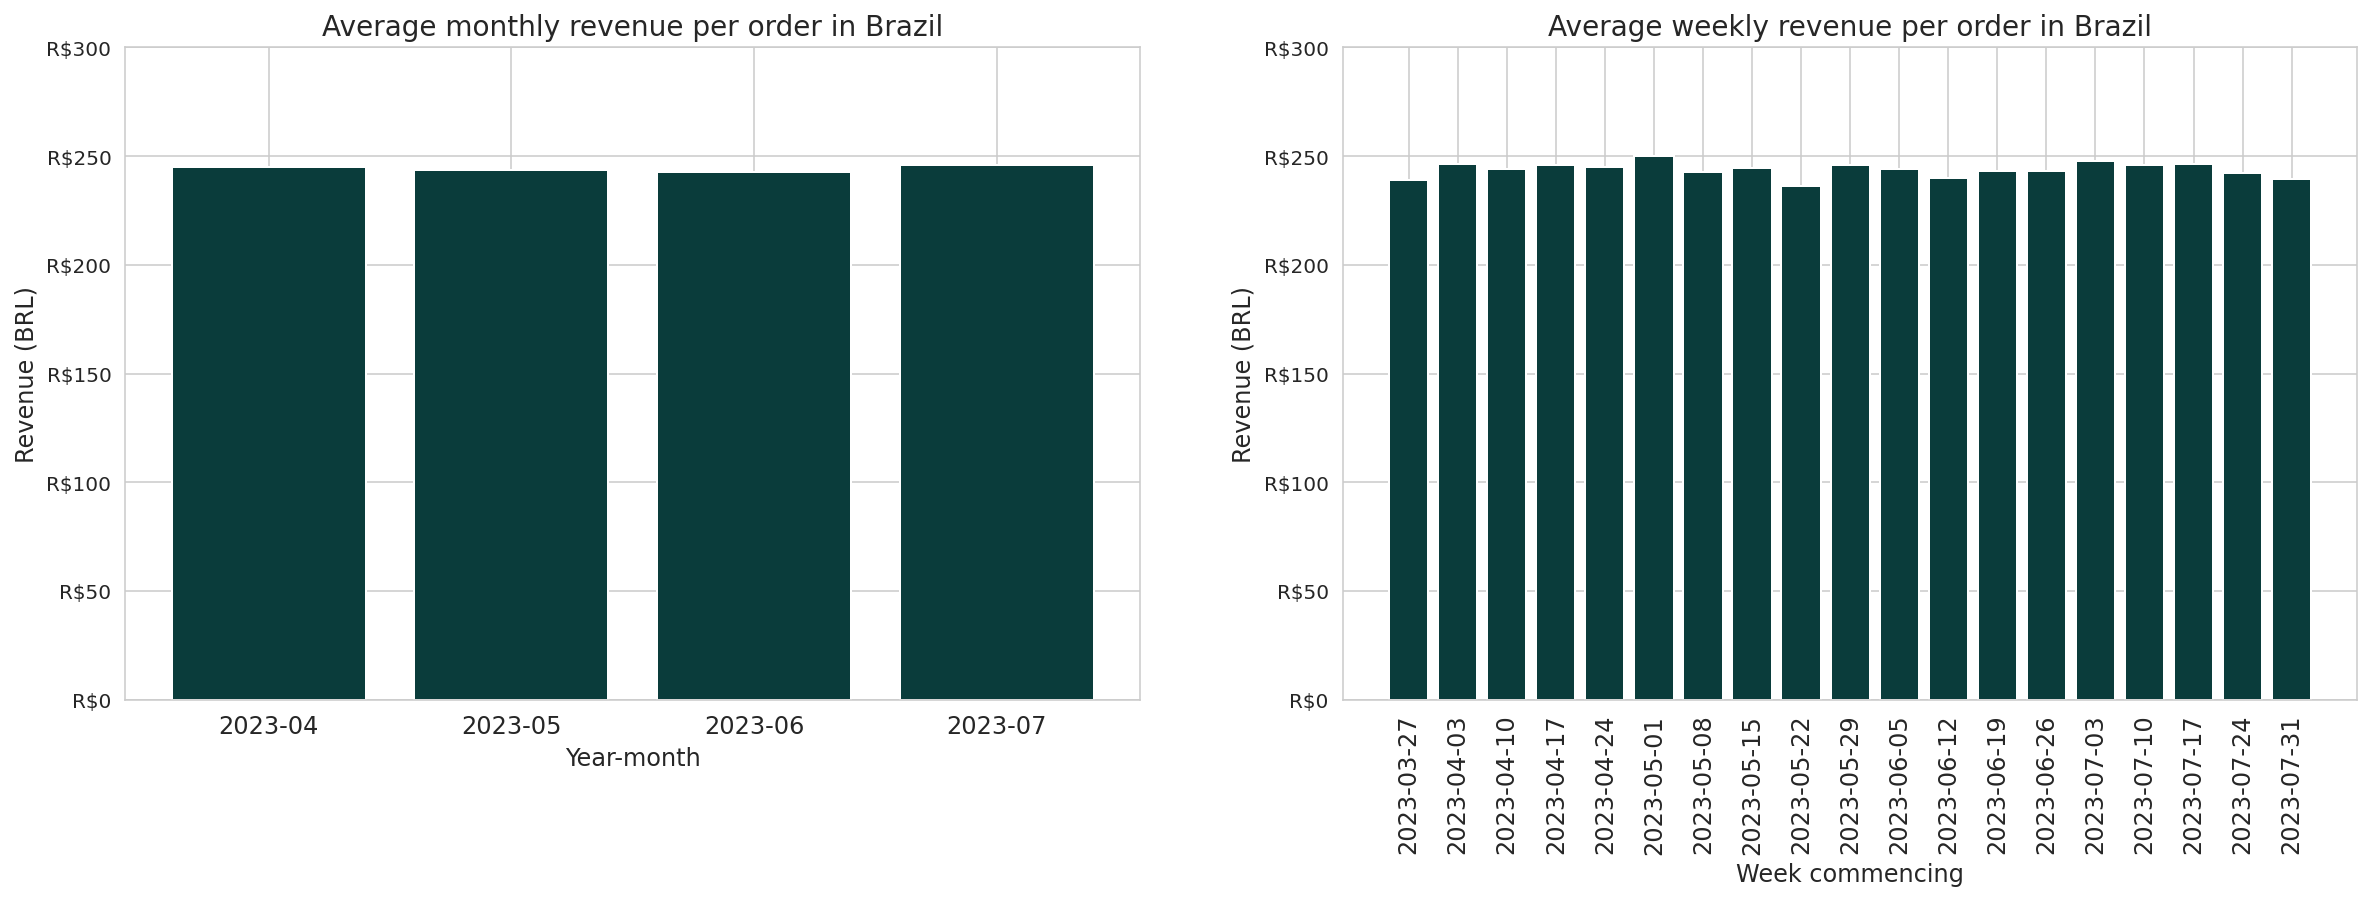

In [16]:
#apply functions for chart
figure_size(20, 6)

bar_chart((121), avg_revenue_monthly['PAYMENT_MONTH'], avg_revenue_monthly['AVG_REV_PER_ORDER'], 
          tcr.StrMethodFormatter('R${x:,.0f}'), (0, 300), avg_revenue_monthly['PAYMENT_MONTH'], 
          None, 'Year-month', 'Revenue (BRL)', 'Average monthly revenue per order in Brazil')

bar_chart((122), avg_revenue_weekly['PAYMENT_WEEK_START'], avg_revenue_weekly['AVG_REV_PER_ORDER'], 
          tcr.StrMethodFormatter('R${x:,.0f}'), (0, 300), avg_revenue_weekly['PAYMENT_WEEK_START'], 
          90, 'Week commencing', 'Revenue (BRL)', 'Average weekly revenue per order in Brazil')

In [17]:
#group dataframe by day for chart
successful_orders_daily = successful_orders.groupby('PAYMENT_DATE').agg({'PAYMENT_AMOUNT_LOCAL': \
                                                                            ['sum','count']}).reset_index()

#get columns titles on one line
successful_orders_daily.columns = successful_orders_daily.columns.map(' | '.join).str.strip(' | ')

#convert revenue column into millions
successful_orders_daily['Revenue (hundred thousands)'] = (successful_orders_daily['PAYMENT_AMOUNT_LOCAL | sum'] / 100000)

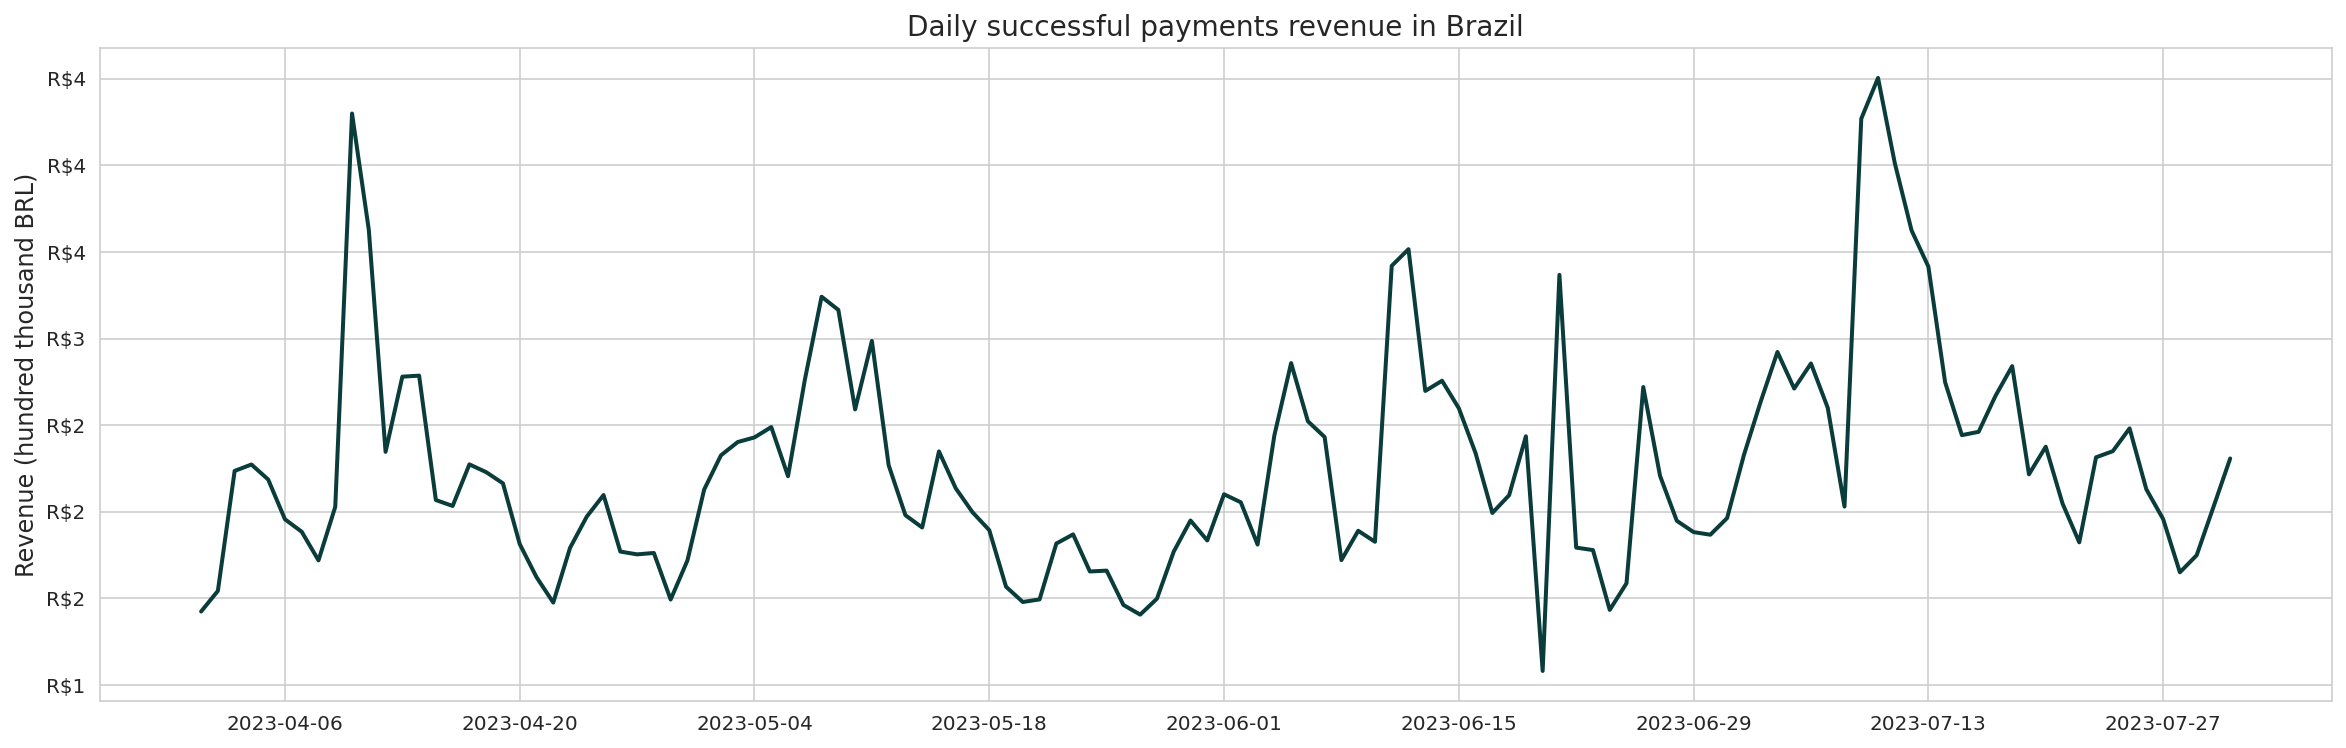

In [18]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), successful_orders_daily['PAYMENT_DATE'], successful_orders_daily['Revenue (hundred thousands)'], 
           tcr.StrMethodFormatter('R${x:,.0f}'), None, 'Revenue (hundred thousand BRL)', 
           'Daily successful payments revenue in Brazil')

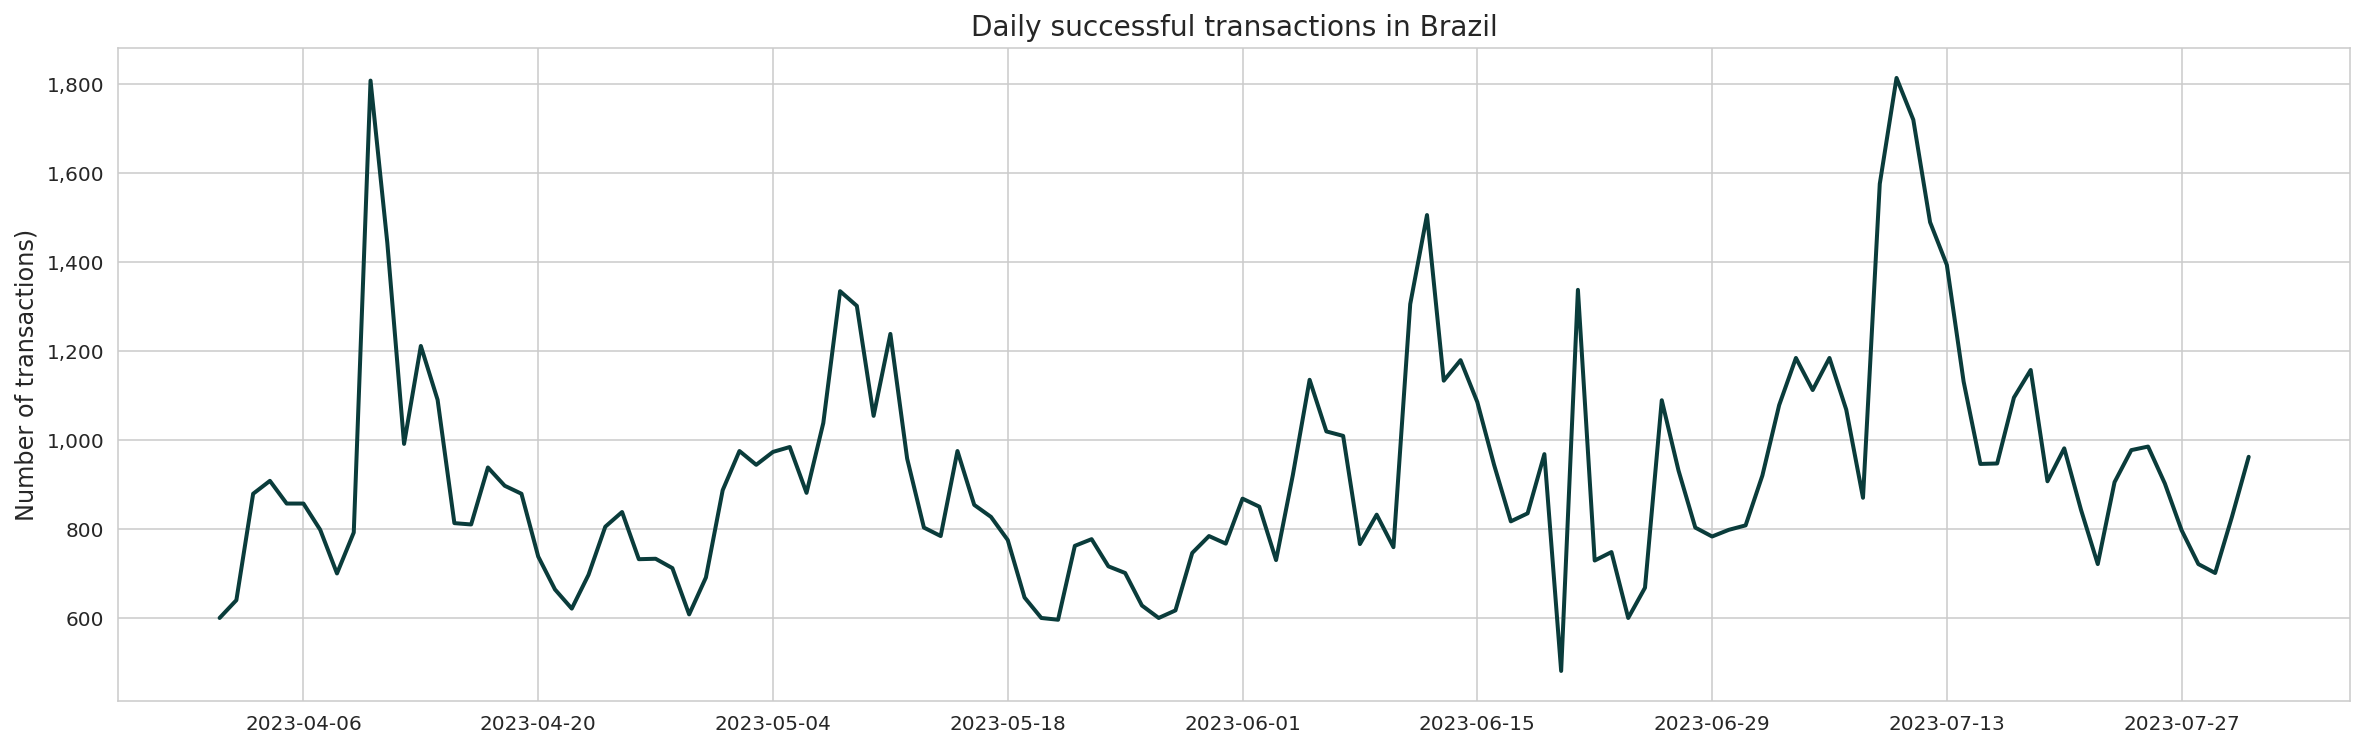

In [19]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), successful_orders_daily['PAYMENT_DATE'], 
           successful_orders_daily['PAYMENT_AMOUNT_LOCAL | count'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Number of transactions)', 
           'Daily successful transactions in Brazil')

# Failed Payments

In [20]:
#create dataframe for failed payments
failed_payments = payments[payments['IS_FAILED'] == True]

In [21]:
#count total failed payments and unique failed payments by month
failed_payments_monthly = failed_payments.groupby('PAYMENT_MONTH').agg({'ORDER_ID': \
                                                                        ['count', 'nunique']}).reset_index()

#get columns titles on one line
failed_payments_monthly.columns = failed_payments_monthly.columns.map(' | '.join).str.strip(' | ')

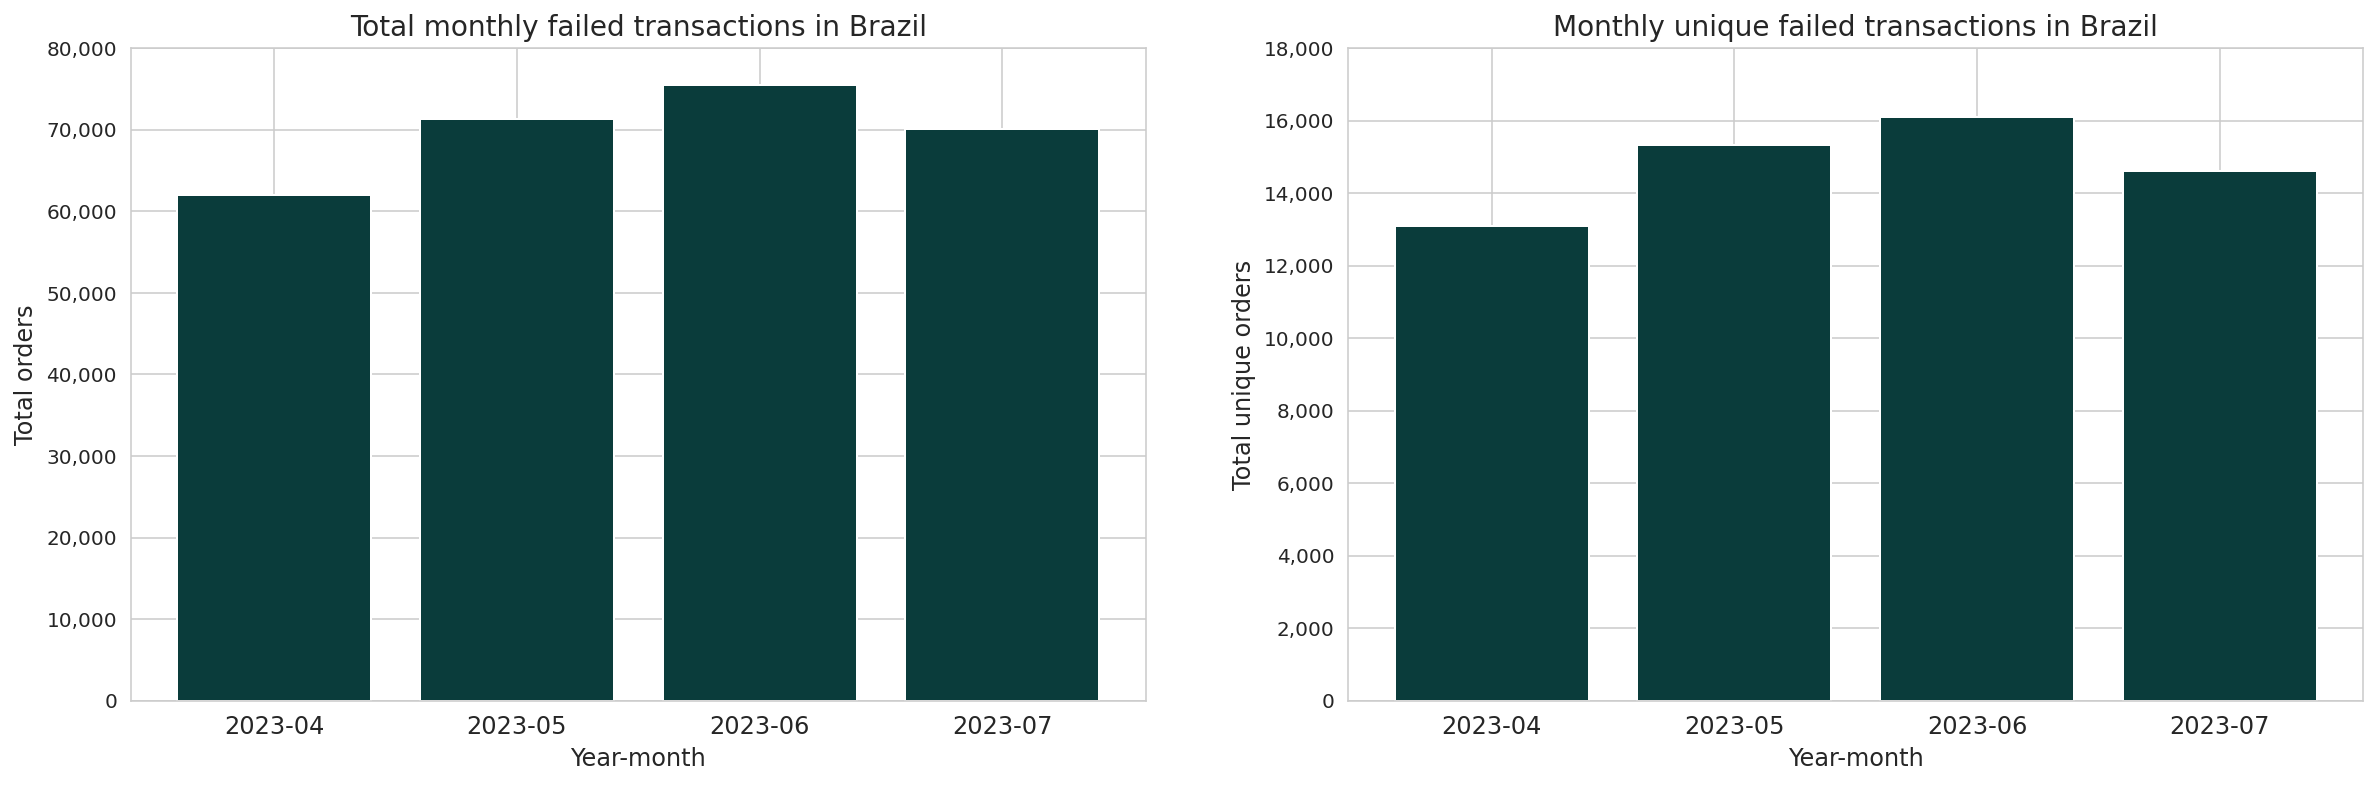

In [22]:
#apply functions for chart
figure_size(20, 6)

bar_chart((121), failed_payments_monthly['PAYMENT_MONTH'], failed_payments_monthly['ORDER_ID | count'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 80000), failed_payments_monthly['PAYMENT_MONTH'], 
          None, 'Year-month', 'Total orders', 'Total monthly failed transactions in Brazil')

bar_chart((122), failed_payments_monthly['PAYMENT_MONTH'], failed_payments_monthly['ORDER_ID | nunique'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 18000), failed_payments_monthly['PAYMENT_MONTH'], 
          None, 'Year-month', 'Total unique orders', 'Monthly unique failed transactions in Brazil')

In [23]:
#count total failed payments and unique failed payments by week
failed_payments_weekly = failed_payments.groupby('PAYMENT_WEEK_START').agg({'ORDER_ID': \
                                                                             ['count', 'nunique']}).\
reset_index()

#get columns titles on one line
failed_payments_weekly.columns = failed_payments_weekly.columns.map(' | '.join).str.strip(' | ')

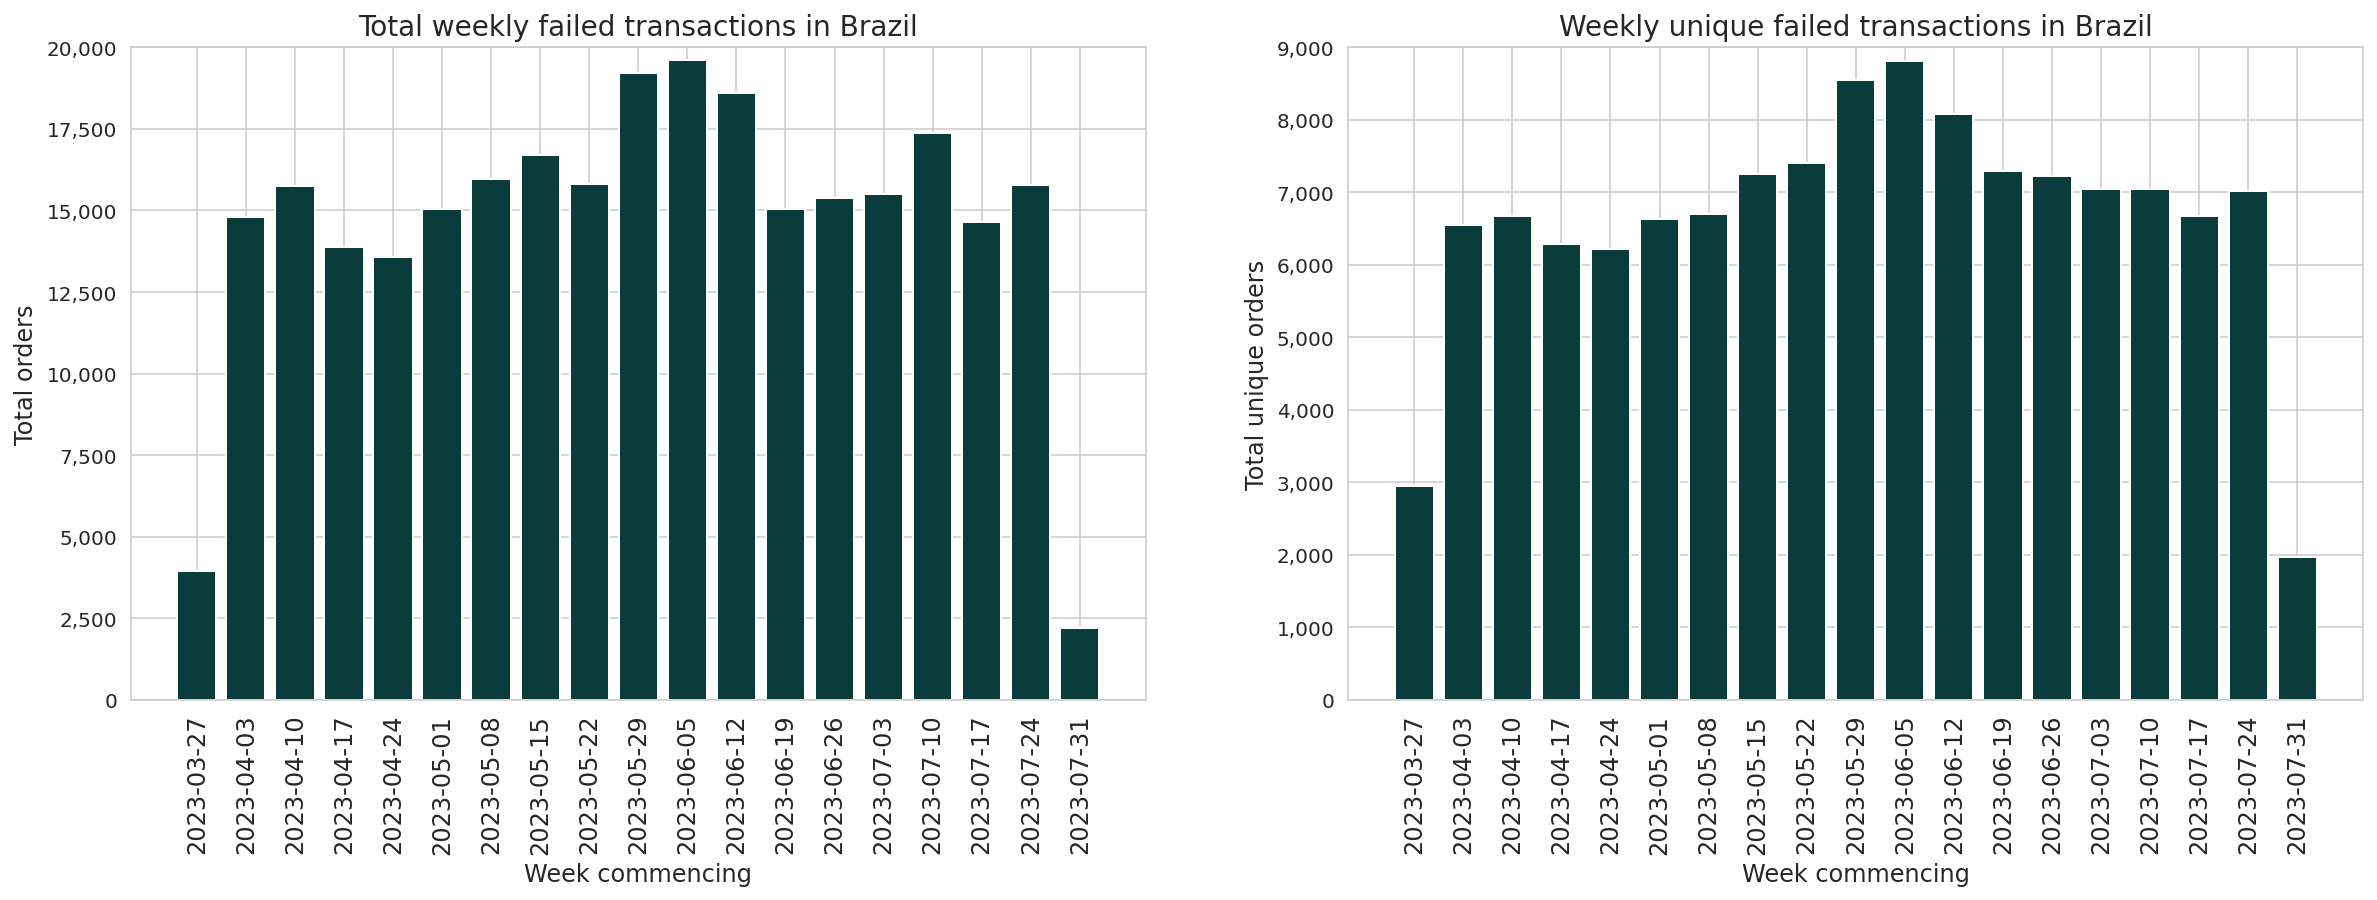

In [24]:
#apply functions for chart
figure_size(20, 6)

bar_chart((121), failed_payments_weekly['PAYMENT_WEEK_START'], failed_payments_weekly['ORDER_ID | count'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 20000), failed_payments_weekly['PAYMENT_WEEK_START'], 90, 
          'Week commencing', 'Total orders', 'Total weekly failed transactions in Brazil')

bar_chart((122), failed_payments_weekly['PAYMENT_WEEK_START'], failed_payments_weekly['ORDER_ID | nunique'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 9000),failed_payments_weekly['PAYMENT_WEEK_START'], 
          90, 'Week commencing', 'Total unique orders', 'Weekly unique failed transactions in Brazil')

In [25]:
#find daily failed transactions
failed_payments_daily = failed_payments.groupby('PAYMENT_DATE').agg({'ORDER_ID': \
                                                                    ['count', 'nunique']}).reset_index()

#get columns titles on one line
failed_payments_daily.columns = failed_payments_daily.columns.map(' | '.join).str.strip(' | ')

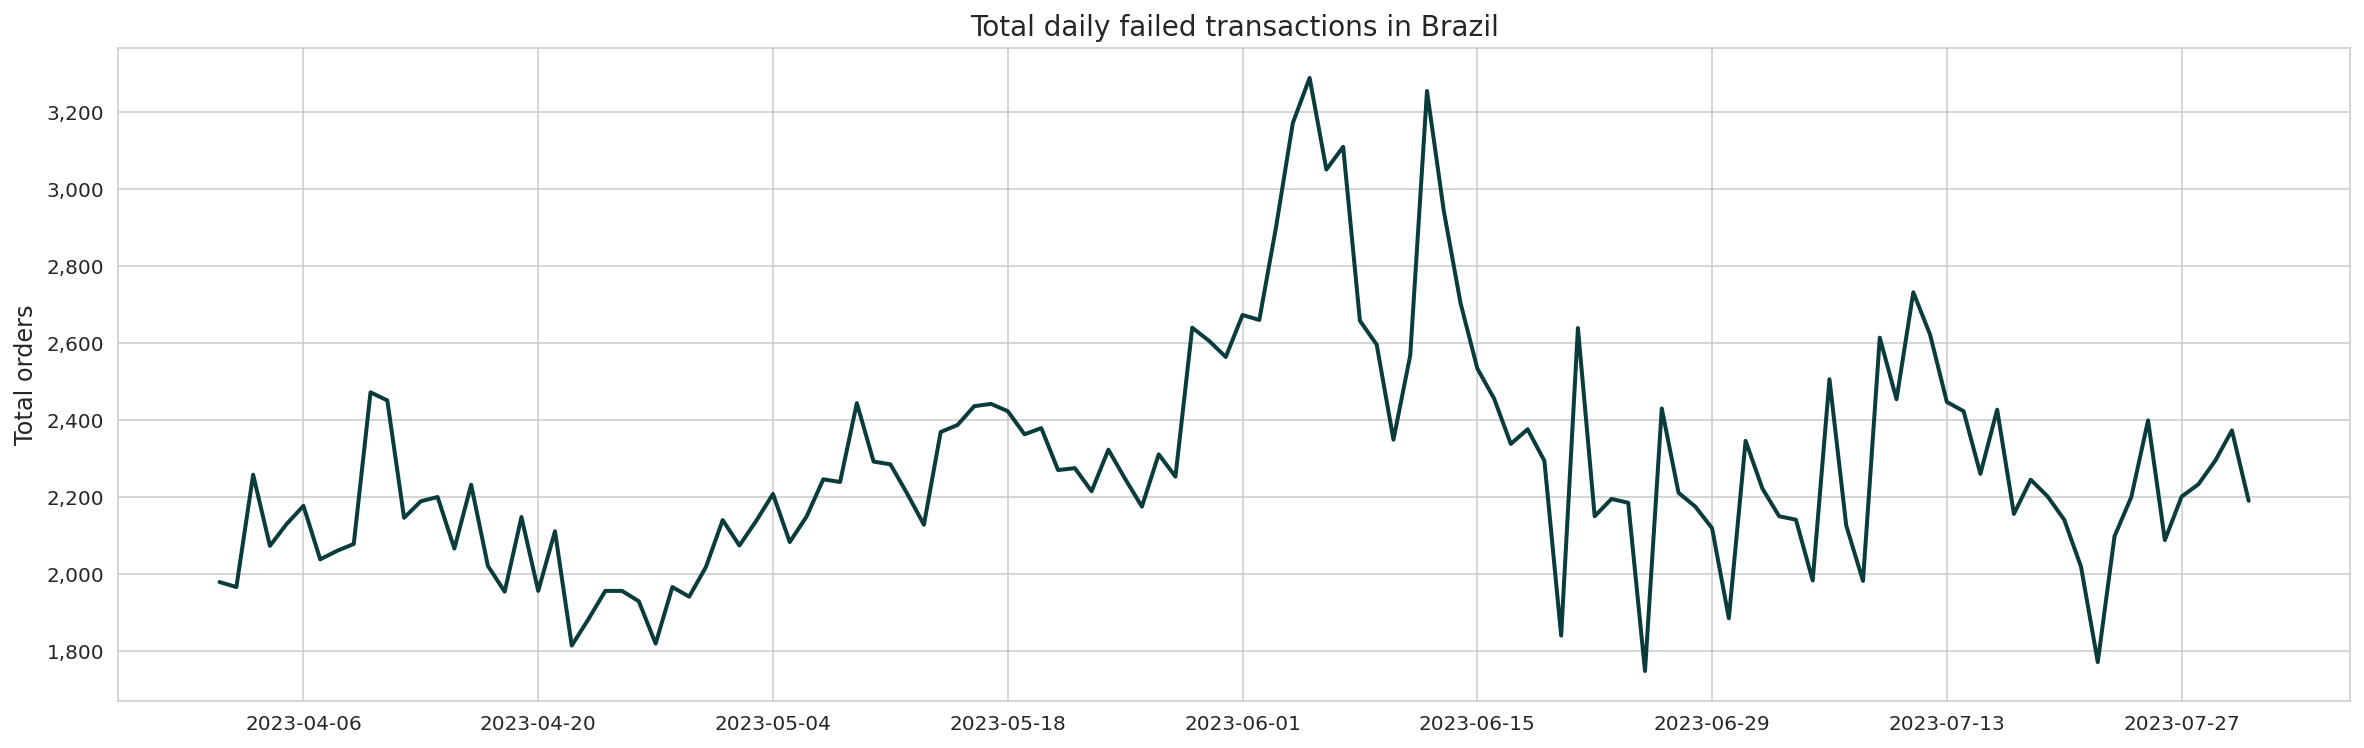

In [26]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), failed_payments_daily['PAYMENT_DATE'], failed_payments_daily['ORDER_ID | count'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Total orders', 'Total daily failed transactions in Brazil')

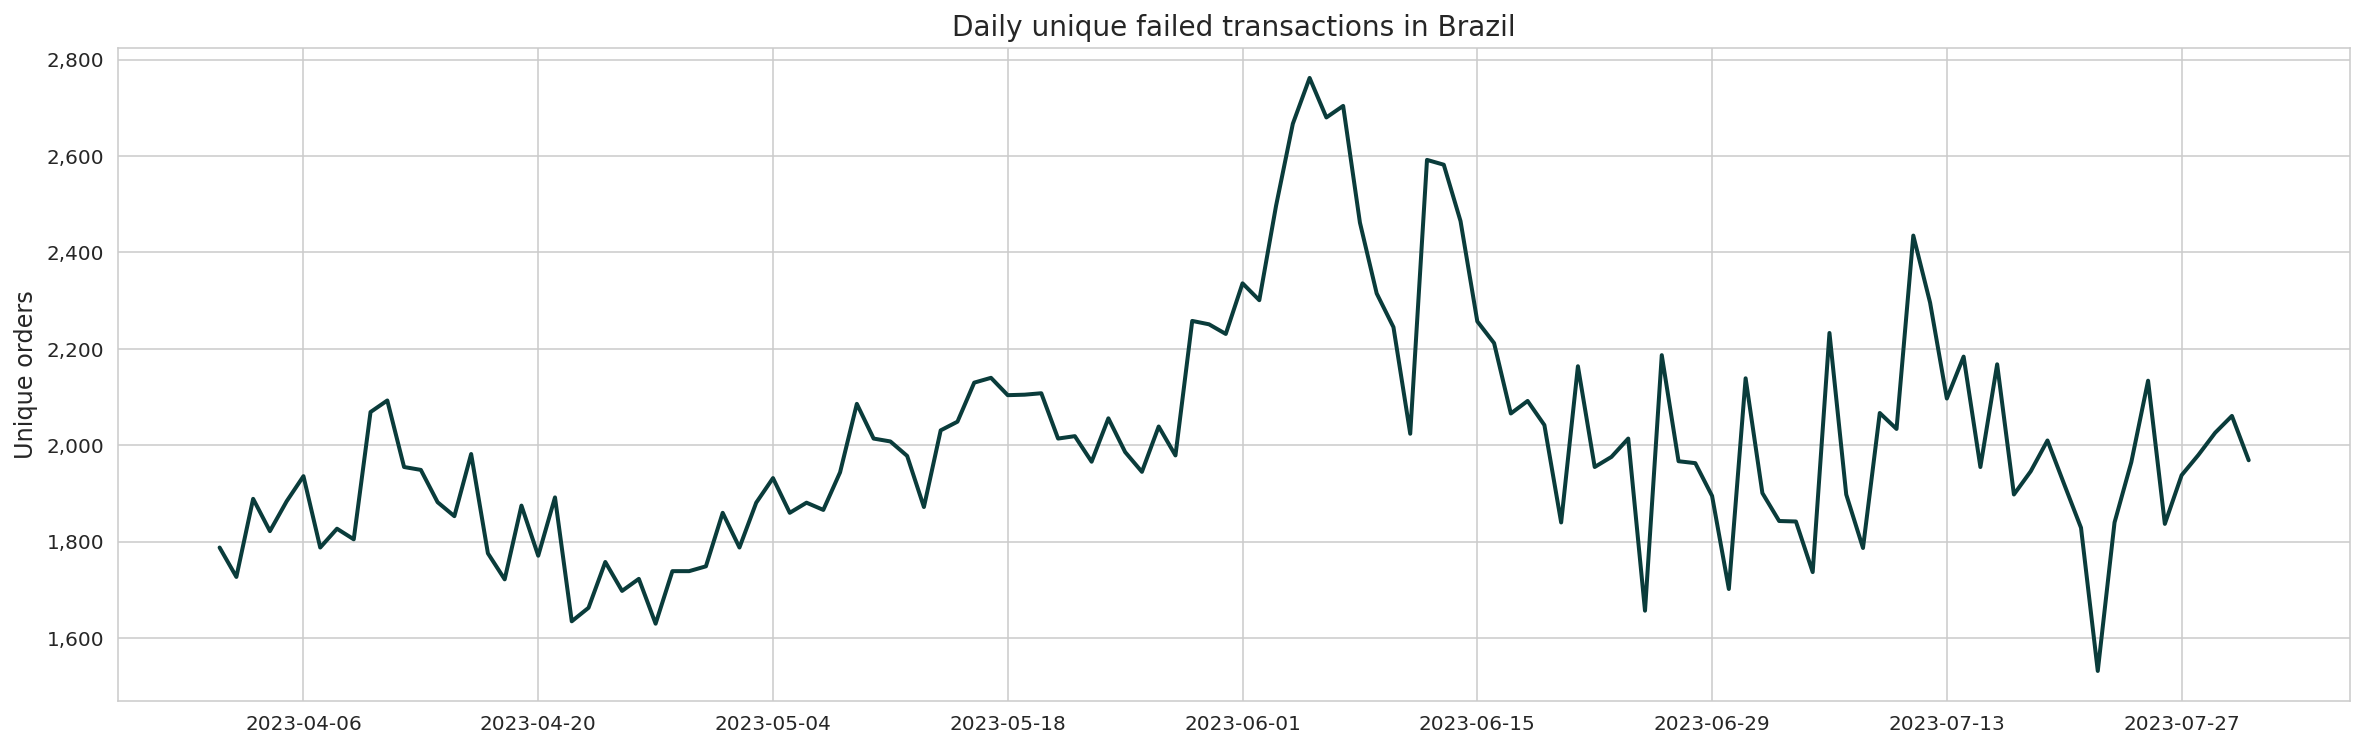

In [27]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), failed_payments_daily['PAYMENT_DATE'], failed_payments_daily['ORDER_ID | nunique'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Unique orders', 'Daily unique failed transactions in Brazil')

In [28]:
#create small version of failure table so we can see when exactly the failures spiked
failed_payments_small = failed_payments[(failed_payments['PAYMENT_DATE'] >= '2023-05-25') & 
                                        (failed_payments['PAYMENT_DATE'] <= '2023-06-20')]

In [29]:
#count total failed payments and unique failed payments by day in narrower window
failed_payments_daily_small = failed_payments_small.groupby('PAYMENT_DATE').agg({'ORDER_ID': \
                                                                             ['count', 'nunique']}).\
reset_index()

#get columns titles on one line
failed_payments_daily_small.columns = failed_payments_daily_small.columns.map(' | '.join).str.strip(' | ')

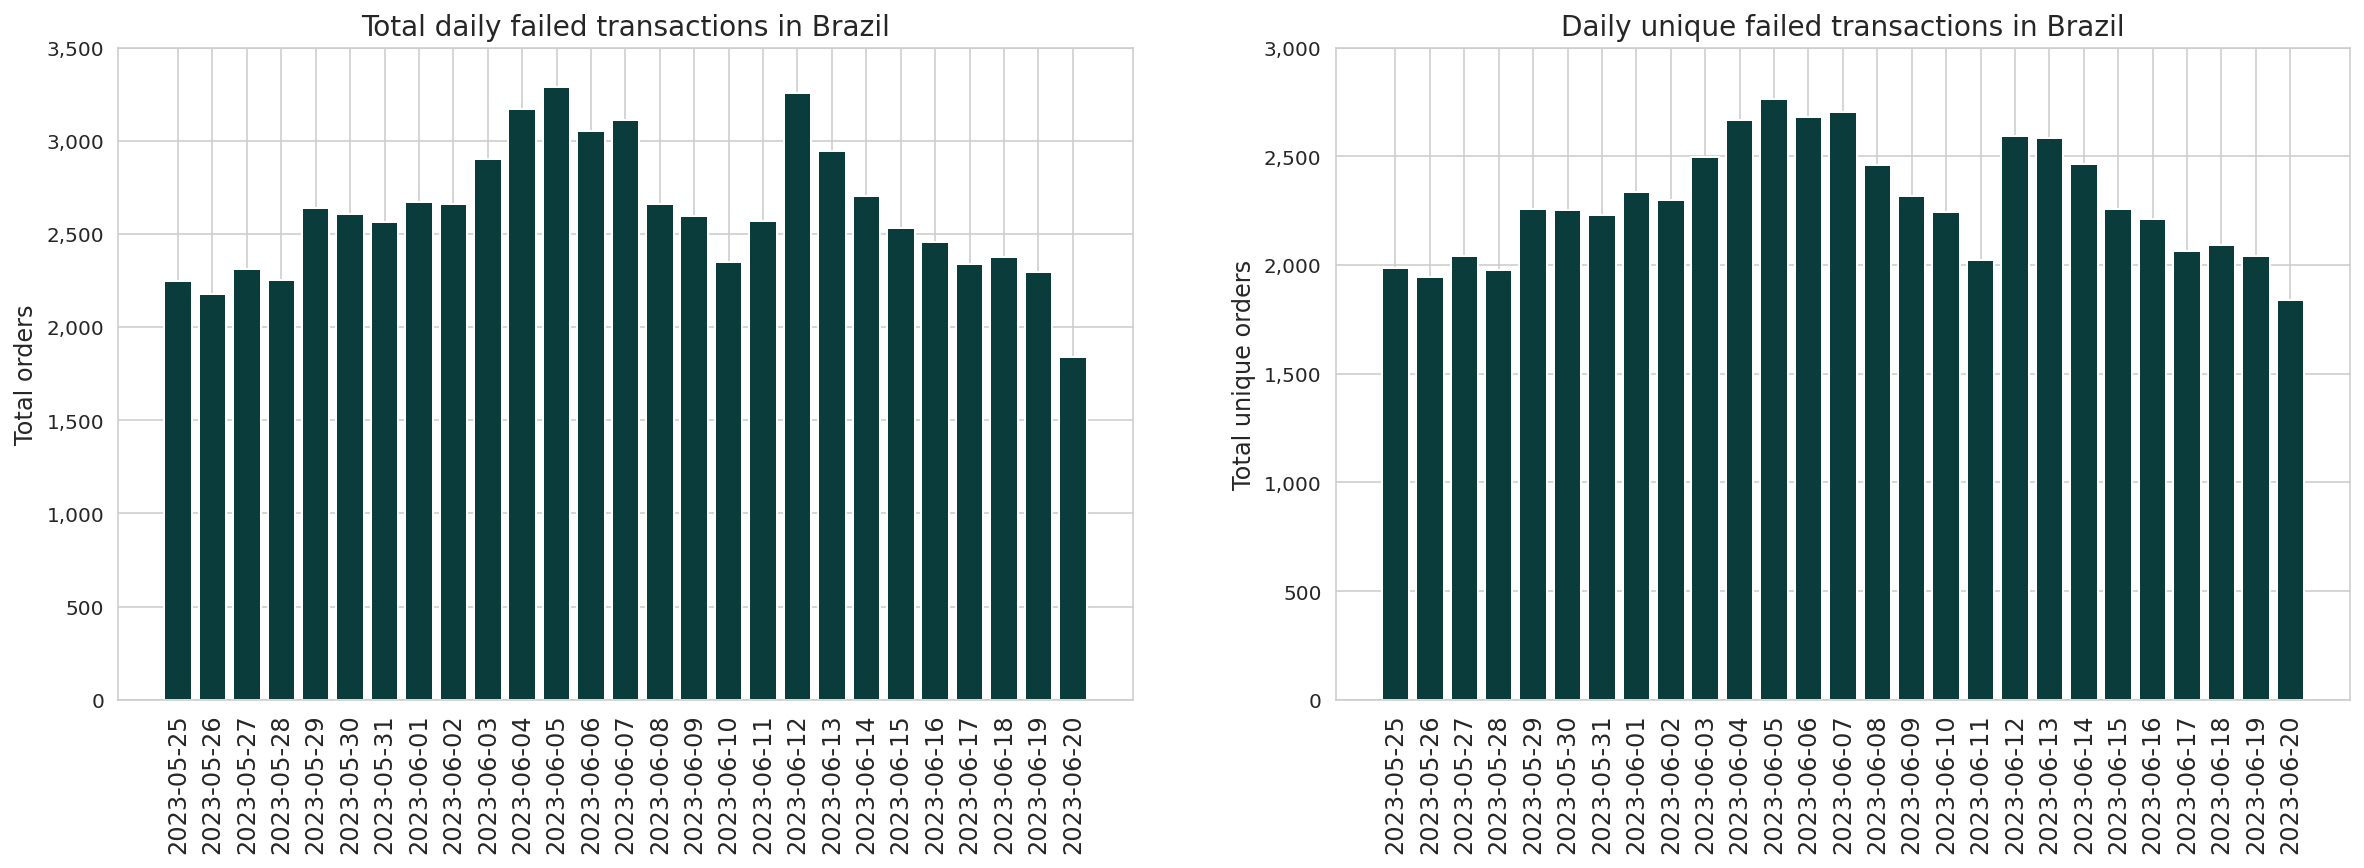

In [30]:
#apply functions for chart
figure_size(20, 6)

bar_chart((121), failed_payments_daily_small['PAYMENT_DATE'], failed_payments_daily_small['ORDER_ID | count'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 3500), failed_payments_daily_small['PAYMENT_DATE'], 
          90, '', 'Total orders', 'Total daily failed transactions in Brazil')

bar_chart((122), failed_payments_daily_small['PAYMENT_DATE'], failed_payments_daily_small['ORDER_ID | nunique'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 3000), failed_payments_daily_small['PAYMENT_DATE'], 
          90, '', 'Total unique orders', 'Daily unique failed transactions in Brazil')

# Failure Reasons

In [31]:
#group by reasons
failure_reasons = failed_payments_small.groupby('REFUSAL_REASON')['ORDER_ID'].count().reset_index().sort_values(by = 'ORDER_ID', ascending = False)

#we'll plot these individually on charts but only for those reasons where values are reasonably high
#drop rows were volumes are low
failure_payments_smaller = failed_payments_small[(failed_payments_small['REFUSAL_REASON'] != 'Withdrawal amount exceeded')\
                                                & (failed_payments_small['REFUSAL_REASON'] != 'Referral') &\
(failed_payments_small['REFUSAL_REASON'] != 'CVC Declined') & \
(failed_payments_small['REFUSAL_REASON'] != 'Issuer Unavailable') &\
(failed_payments_small['REFUSAL_REASON'] != 'Withdrawal count exceeded')]

In [32]:
#group by date and plot charts
failure_reasons_small = failure_payments_smaller.groupby(['PAYMENT_DATE', 'REFUSAL_REASON'])['ORDER_ID'].\
                                    count().reset_index().sort_values(by = 'ORDER_ID', ascending = False)

#pivot data
failure_reasons_small_pivot = failure_reasons_small.pivot_table(columns = 'REFUSAL_REASON',
                                                               index = 'PAYMENT_DATE',
                                                               values = 'ORDER_ID').reset_index().\
rename_axis(None, axis = 1)

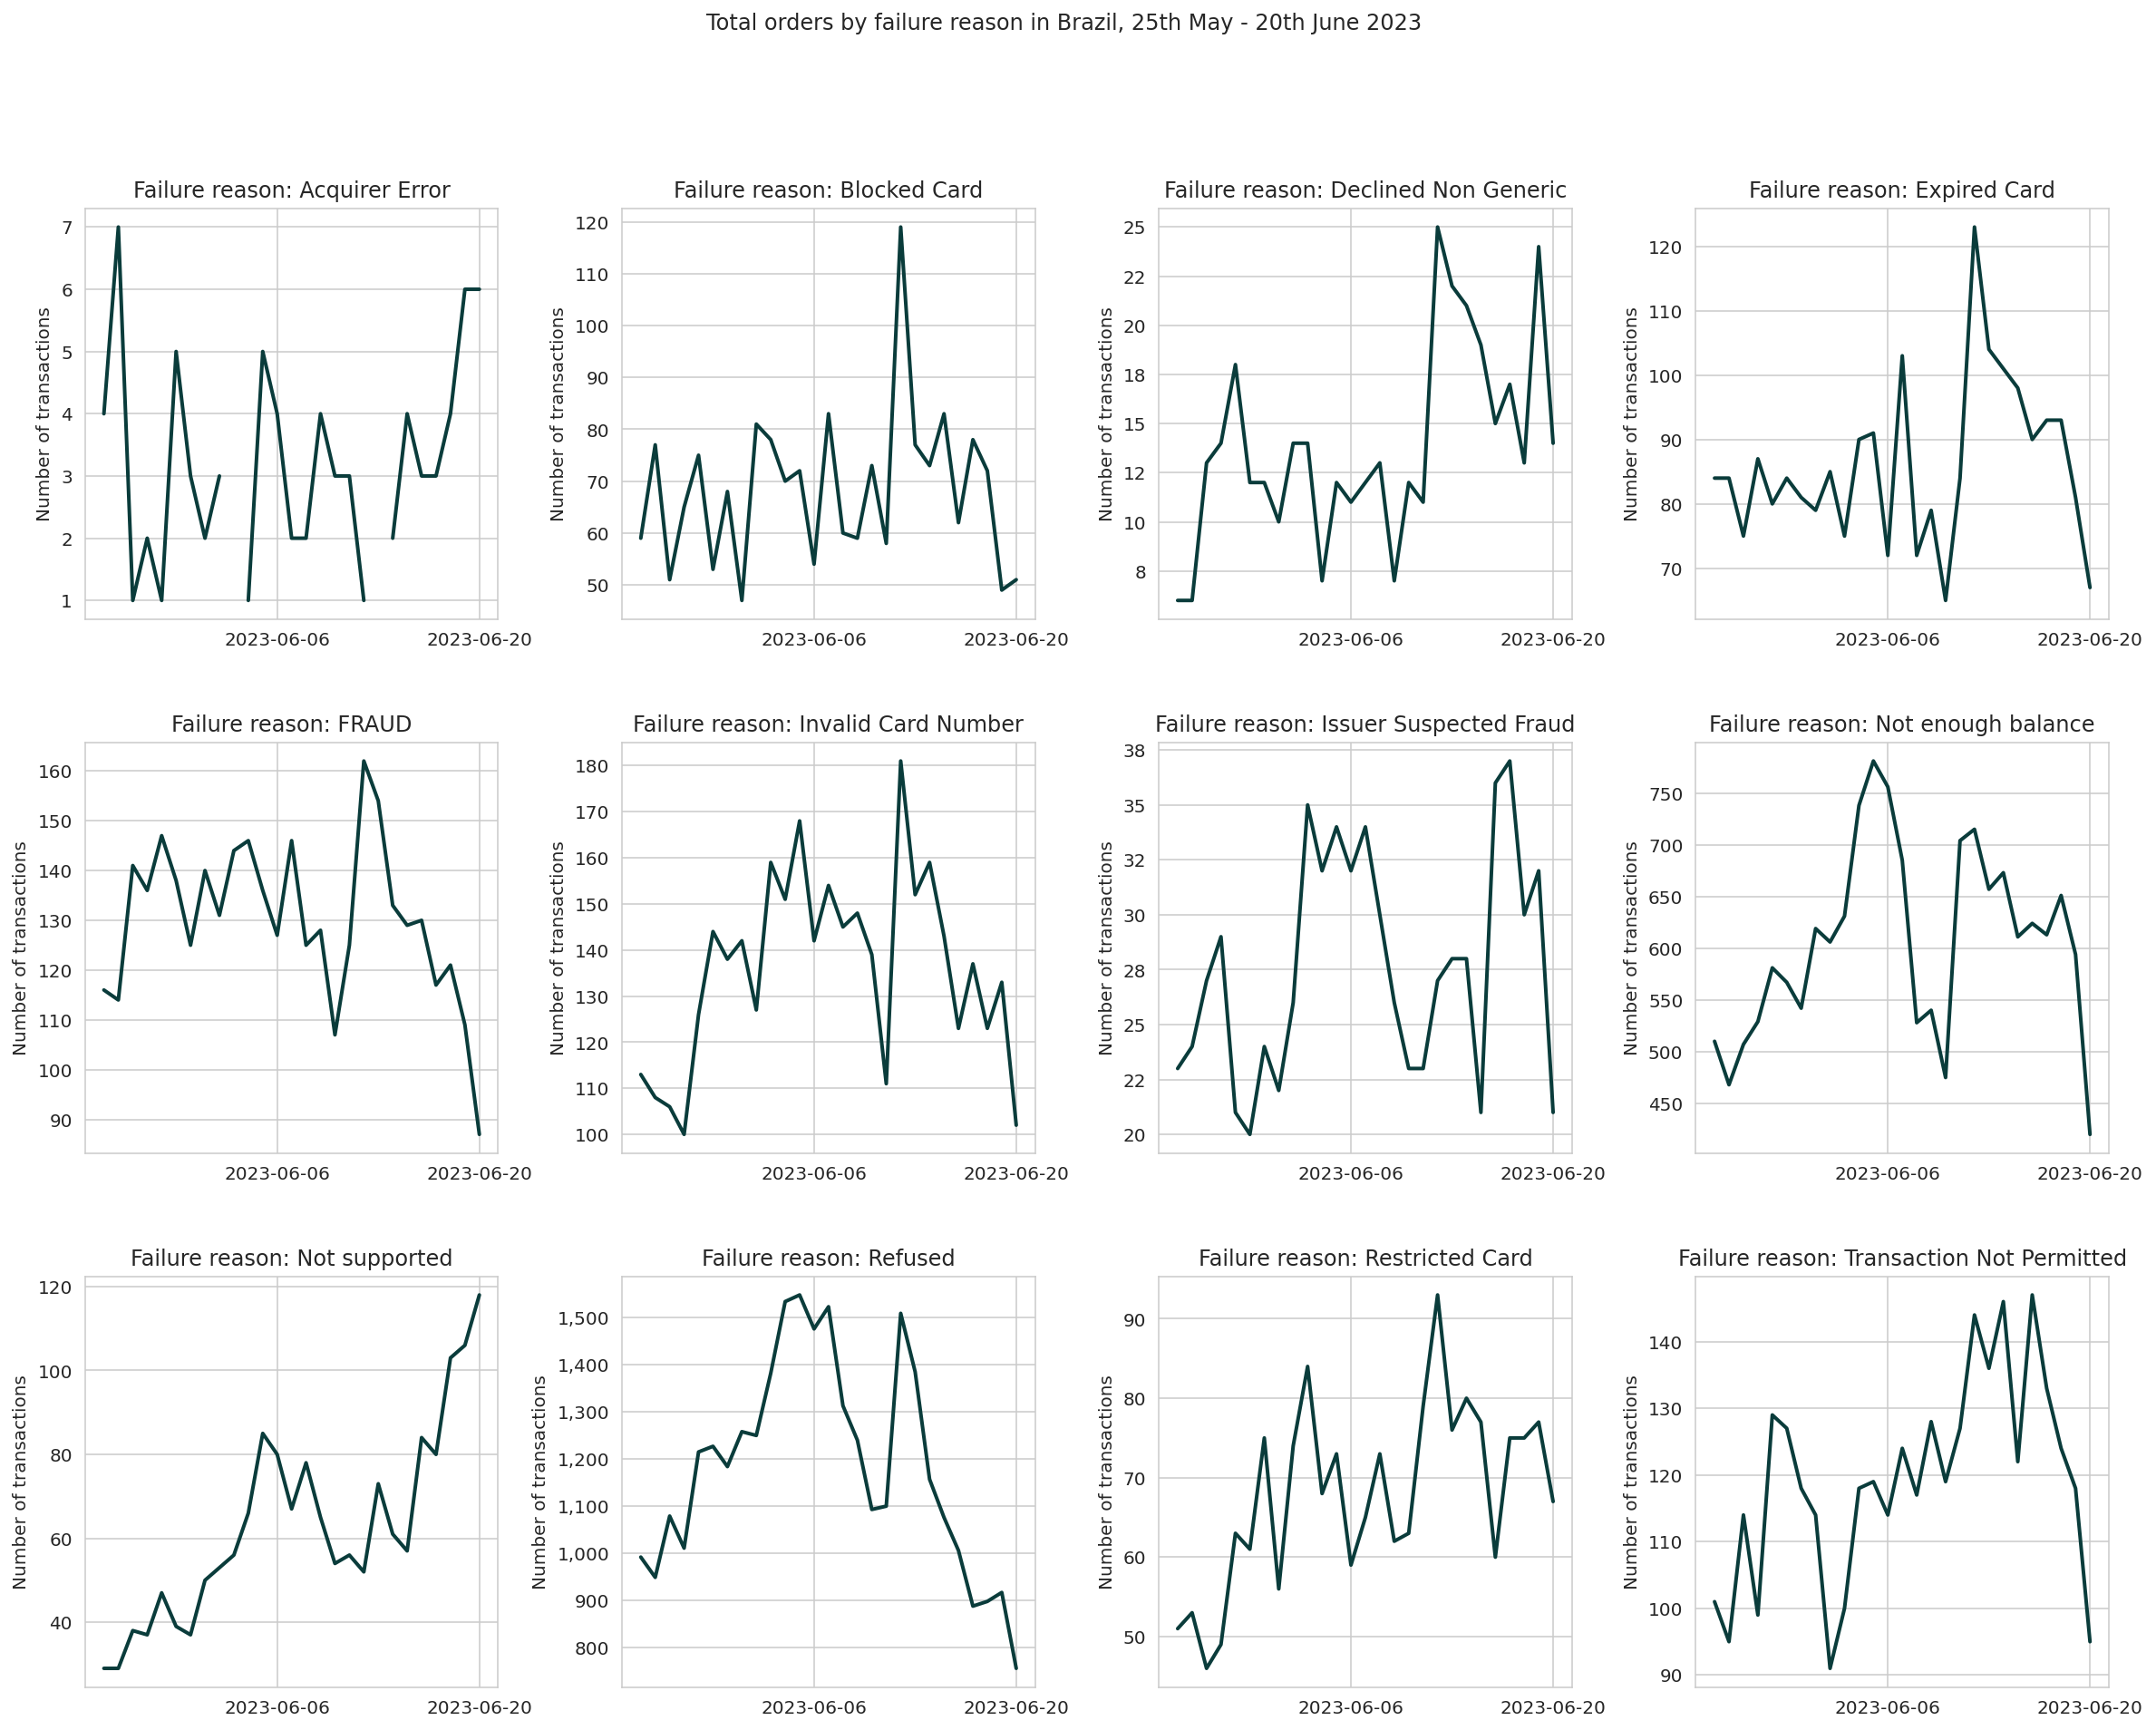

In [33]:
#apply function for charts
figure_size(20, 15)

#create list of columns to iterate over
column_list = ['Acquirer Error', 'Blocked Card', 'Declined Non Generic', 'Expired Card', 'FRAUD', 
               'Invalid Card Number', 'Issuer Suspected Fraud', 'Not enough balance', 'Not supported',
              'Refused', 'Restricted Card', 'Transaction Not Permitted']

for i, column in enumerate(column_list, start = 1):
    ax = plt.subplot(3, 4, i)
    
    plt.plot(failure_reasons_small_pivot['PAYMENT_DATE'], 
             failure_reasons_small_pivot[column], color = '#0A3C3B', linewidth = 2)
    
    #change y axis format
    ax.yaxis.set_major_formatter(tcr.StrMethodFormatter('{x:,.0f}'))
    
    #set frequency of dates on x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
    #add labels
    ax.tick_params(axis = 'x', labelrotation = None)
    ax.set_ylabel('Number of transactions')
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    #set global heading for charts
    plt.suptitle('Total orders by failure reason in Brazil, 25th May - 20th June 2023')
    ax.set_title('Failure reason: ' + column)

# Refused Transactions

In [34]:
#Failure reason 'refused' has two matching spikes - will look at that more closely
refused = failed_payments[failed_payments['REFUSAL_REASON'] == 'Refused']

In [35]:
#find daily failed transactions
refused_daily = refused.groupby('PAYMENT_DATE').agg({'ORDER_ID': ['count', 'nunique']}).reset_index()

#get columns titles on one line
refused_daily.columns = refused_daily.columns.map(' | '.join).str.strip(' | ')

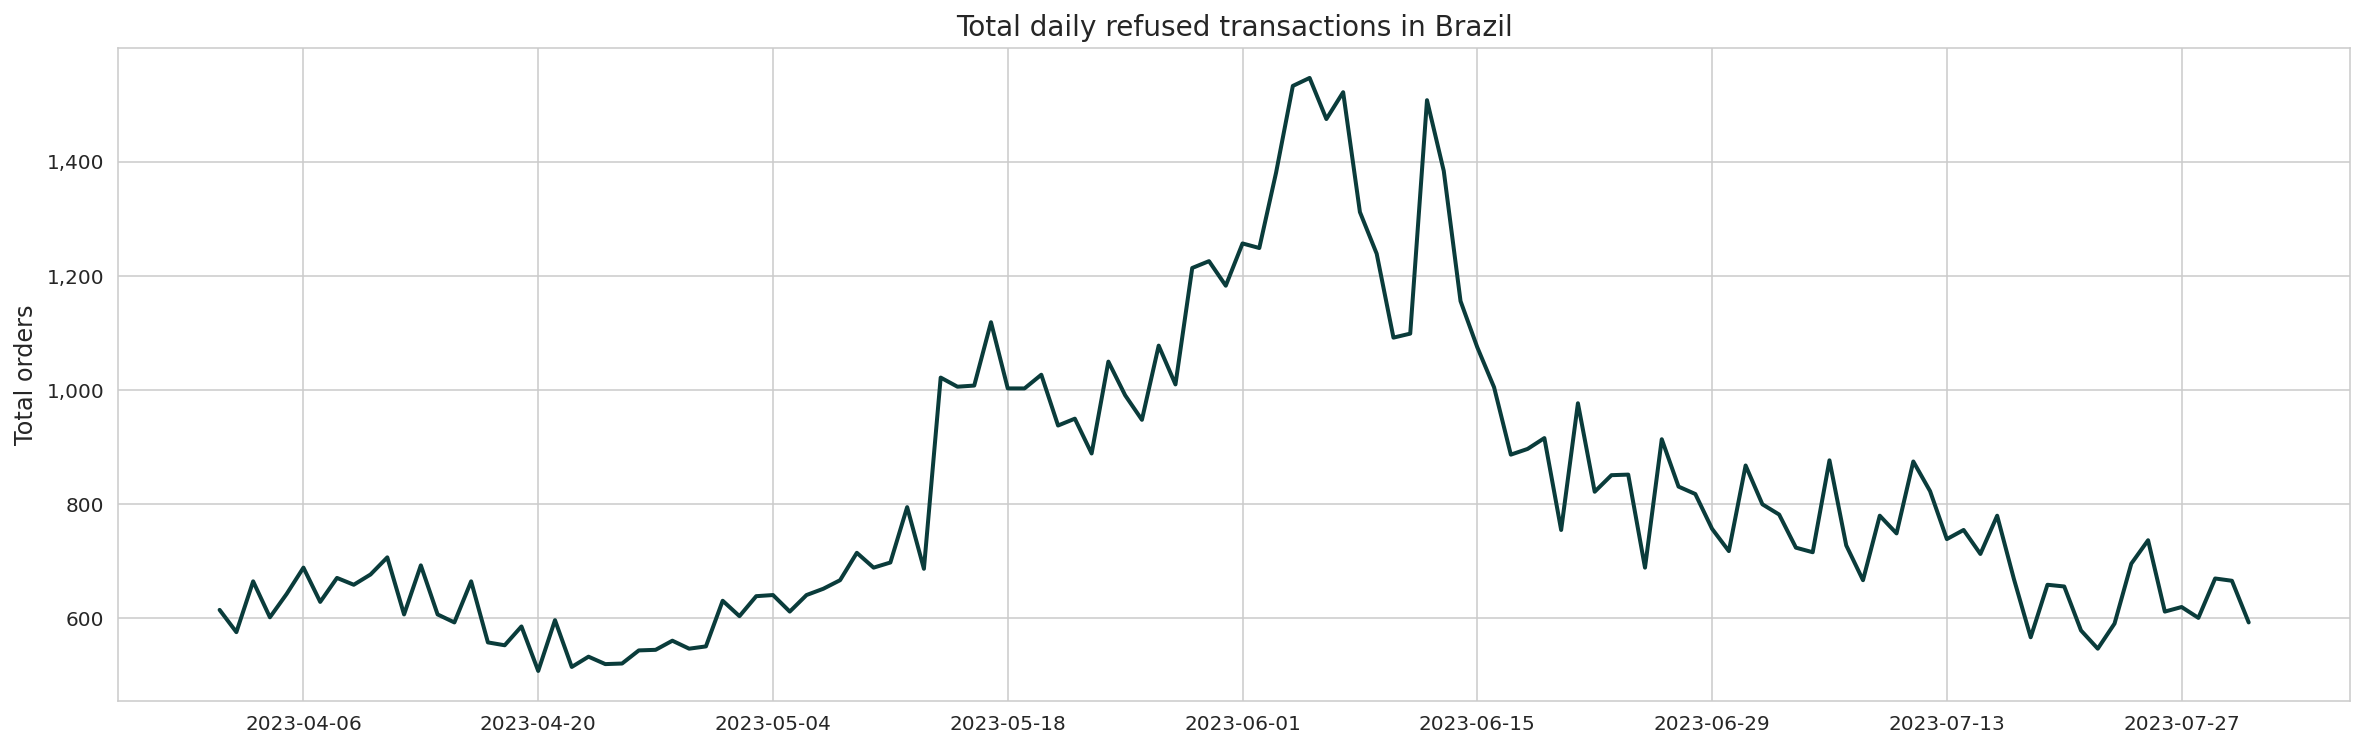

In [36]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), refused_daily['PAYMENT_DATE'], refused_daily['ORDER_ID | count'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Total orders', 
           'Total daily refused transactions in Brazil')

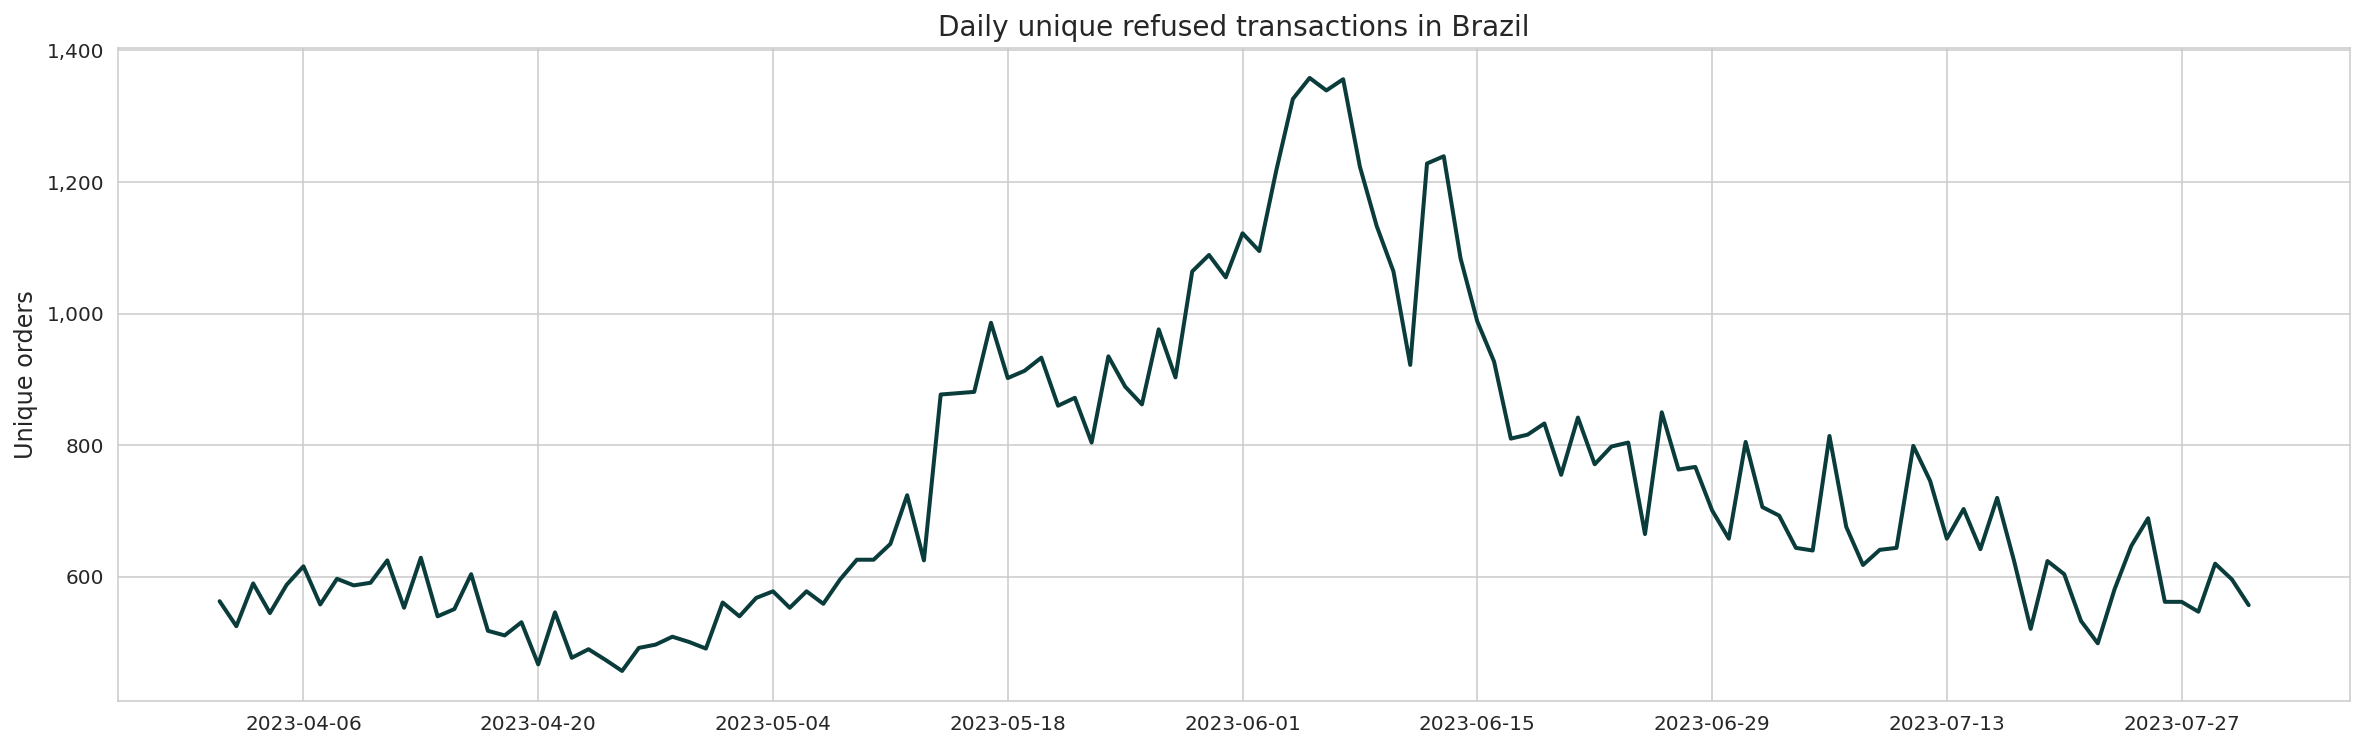

In [37]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), refused_daily['PAYMENT_DATE'], refused_daily['ORDER_ID | nunique'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Unique orders', 'Daily unique refused transactions in Brazil')

In [38]:
#group by detailed reasons to see which come up the most
refused_detailed = refused.groupby('DETAILED_REFUSAL_REASON')['ORDER_ID'].count().reset_index().sort_values(by = 'ORDER_ID', ascending = False)

In [39]:
#most detailed reasons are policy, fraud and lifecycle - will plot these three
refused_small = refused[(refused['DETAILED_REFUSAL_REASON'] == '82 : Policy') | \
                         (refused['DETAILED_REFUSAL_REASON'] == '83 : Fraud/Security') | \
                       (refused['DETAILED_REFUSAL_REASON'] == '79 : Life cycle')]

In [40]:
#group by date and plot charts
refused_small_detailed = refused_small.groupby(['PAYMENT_DATE', 'DETAILED_REFUSAL_REASON'])['ORDER_ID'].\
                                    count().reset_index().sort_values(by = 'ORDER_ID', ascending = False)

#pivot data
refused_small_detailed_pivot = refused_small_detailed.pivot_table(columns = 'DETAILED_REFUSAL_REASON',
                                                               index = 'PAYMENT_DATE',
                                                               values = 'ORDER_ID').reset_index().\
rename_axis(None, axis = 1).rename(columns = {'79 : Life cycle': 'Lifecycle',
                                             '82 : Policy': 'Policy',
                                             '83 : Fraud/Security': 'Fraud/Security'})

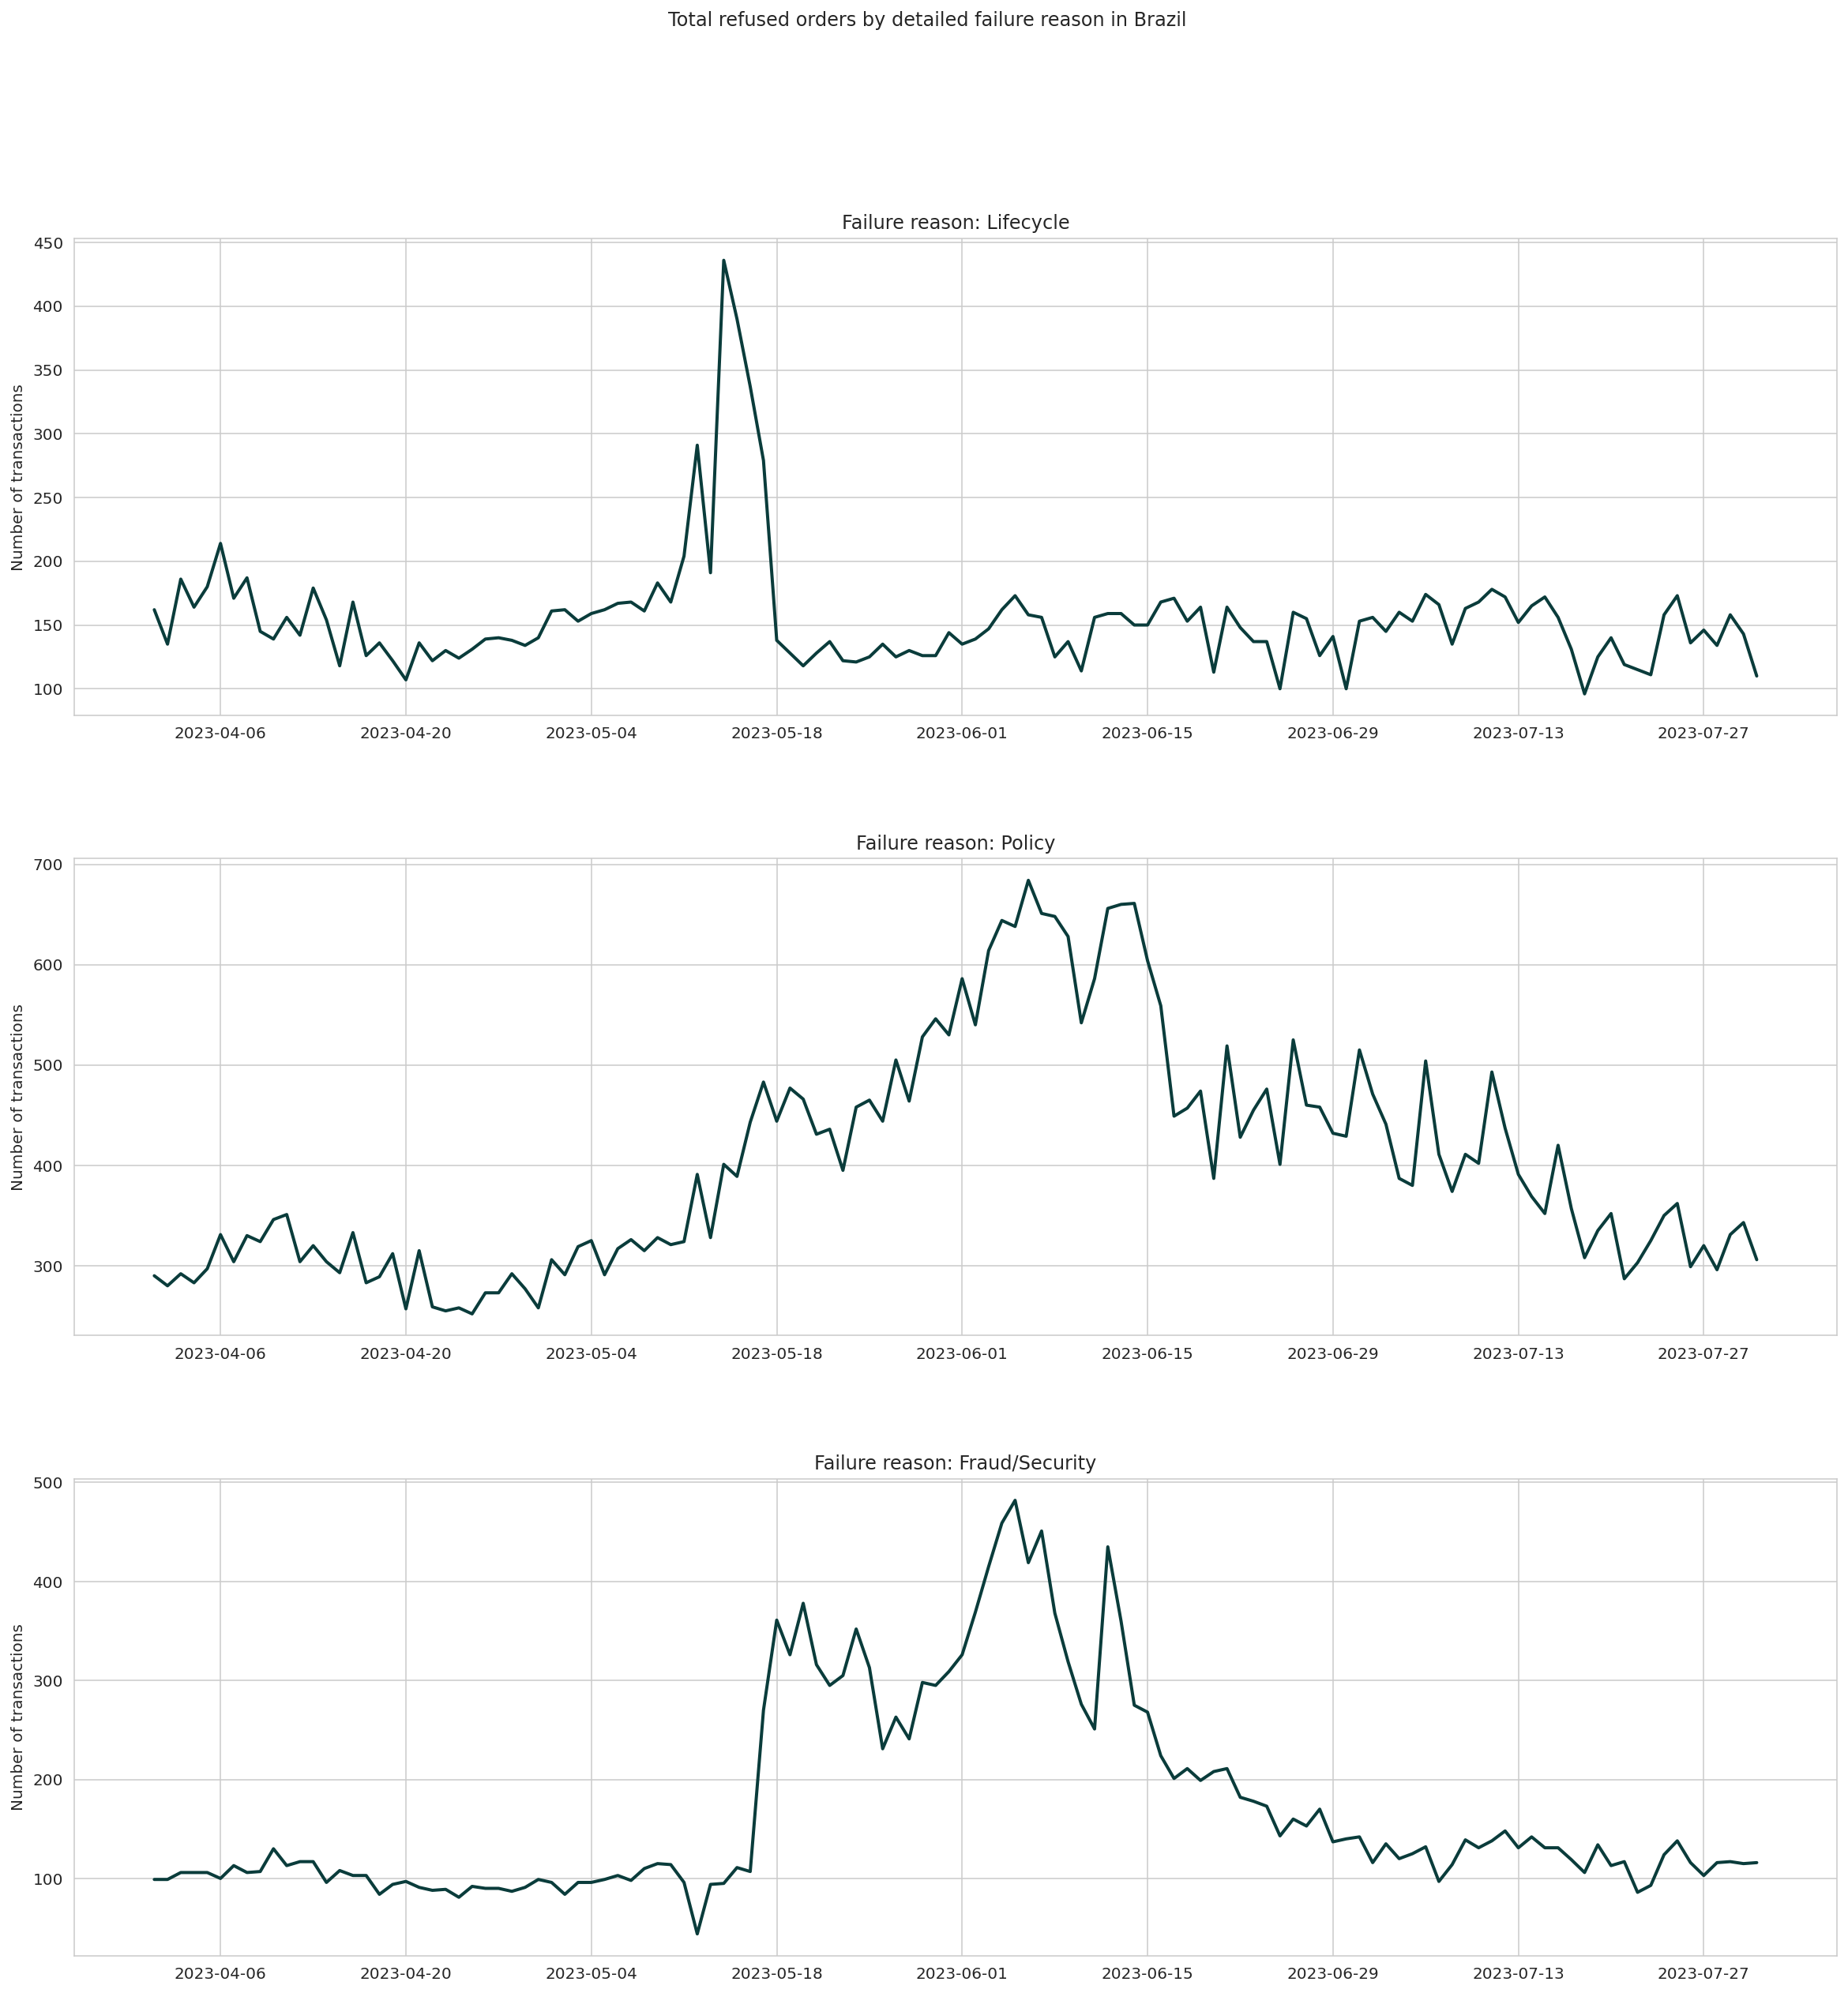

In [41]:
#apply function for charts
figure_size(20, 20)

#create list of columns to iterate over
column_list_detailed = ['Lifecycle', 'Policy', 'Fraud/Security']

for i, column in enumerate(column_list_detailed, start = 1):
    ax = plt.subplot(3, 1, i)
    
    plt.plot(refused_small_detailed_pivot['PAYMENT_DATE'], 
             refused_small_detailed_pivot[column], color = '#0A3C3B', linewidth = 2)
    
    #change y axis format
    ax.yaxis.set_major_formatter(tcr.StrMethodFormatter('{x:,.0f}'))
    
    #set frequency of dates on x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
    #add labels
    ax.tick_params(axis = 'x', labelrotation = None)
    ax.set_ylabel('Number of transactions')
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    #set global heading for charts
    plt.suptitle('Total refused orders by detailed failure reason in Brazil')
    ax.set_title('Failure reason: ' + column)

# Detailed Failure Reason

In [42]:
#now look at all transaction by detailed reason
failure_reasons_detailed = failed_payments.groupby('DETAILED_REFUSAL_REASON')['ORDER_ID'].count().reset_index().sort_values(by = 'ORDER_ID', ascending = False)

In [43]:
#most detailed reasons are policy, fraud and lifecycle and insufficient funds - will plot these four
detailed_small = failed_payments[(failed_payments['DETAILED_REFUSAL_REASON'] == \
                                           '51 : Insufficient funds/over credit limit') | \
                         (failed_payments['DETAILED_REFUSAL_REASON'] == '82 : Policy') | \
                       (failed_payments['DETAILED_REFUSAL_REASON'] == '83 : Fraud/Security') | \
                        (failed_payments['DETAILED_REFUSAL_REASON'] == '79 : Life cycle')]

In [44]:
#group by date and plot charts
detailed_small_grouped = detailed_small.groupby(['PAYMENT_DATE', 'DETAILED_REFUSAL_REASON'])['ORDER_ID'].\
                                    count().reset_index().sort_values(by = 'ORDER_ID', ascending = False)

#pivot data
detailed_small_grouped_pivot = detailed_small_grouped.pivot_table(columns = 'DETAILED_REFUSAL_REASON',
                                                               index = 'PAYMENT_DATE',
                                                               values = 'ORDER_ID').reset_index().\
rename_axis(None, axis = 1).rename(columns = {'51 : Insufficient funds/over credit limit': \
                                              'Insufficient funds/over credit limit',
                                             '79 : Life cycle': 'Lifecycle',
                                             '82 : Policy': 'Policy',
                                             '83 : Fraud/Security': 'Fraud/Security'})

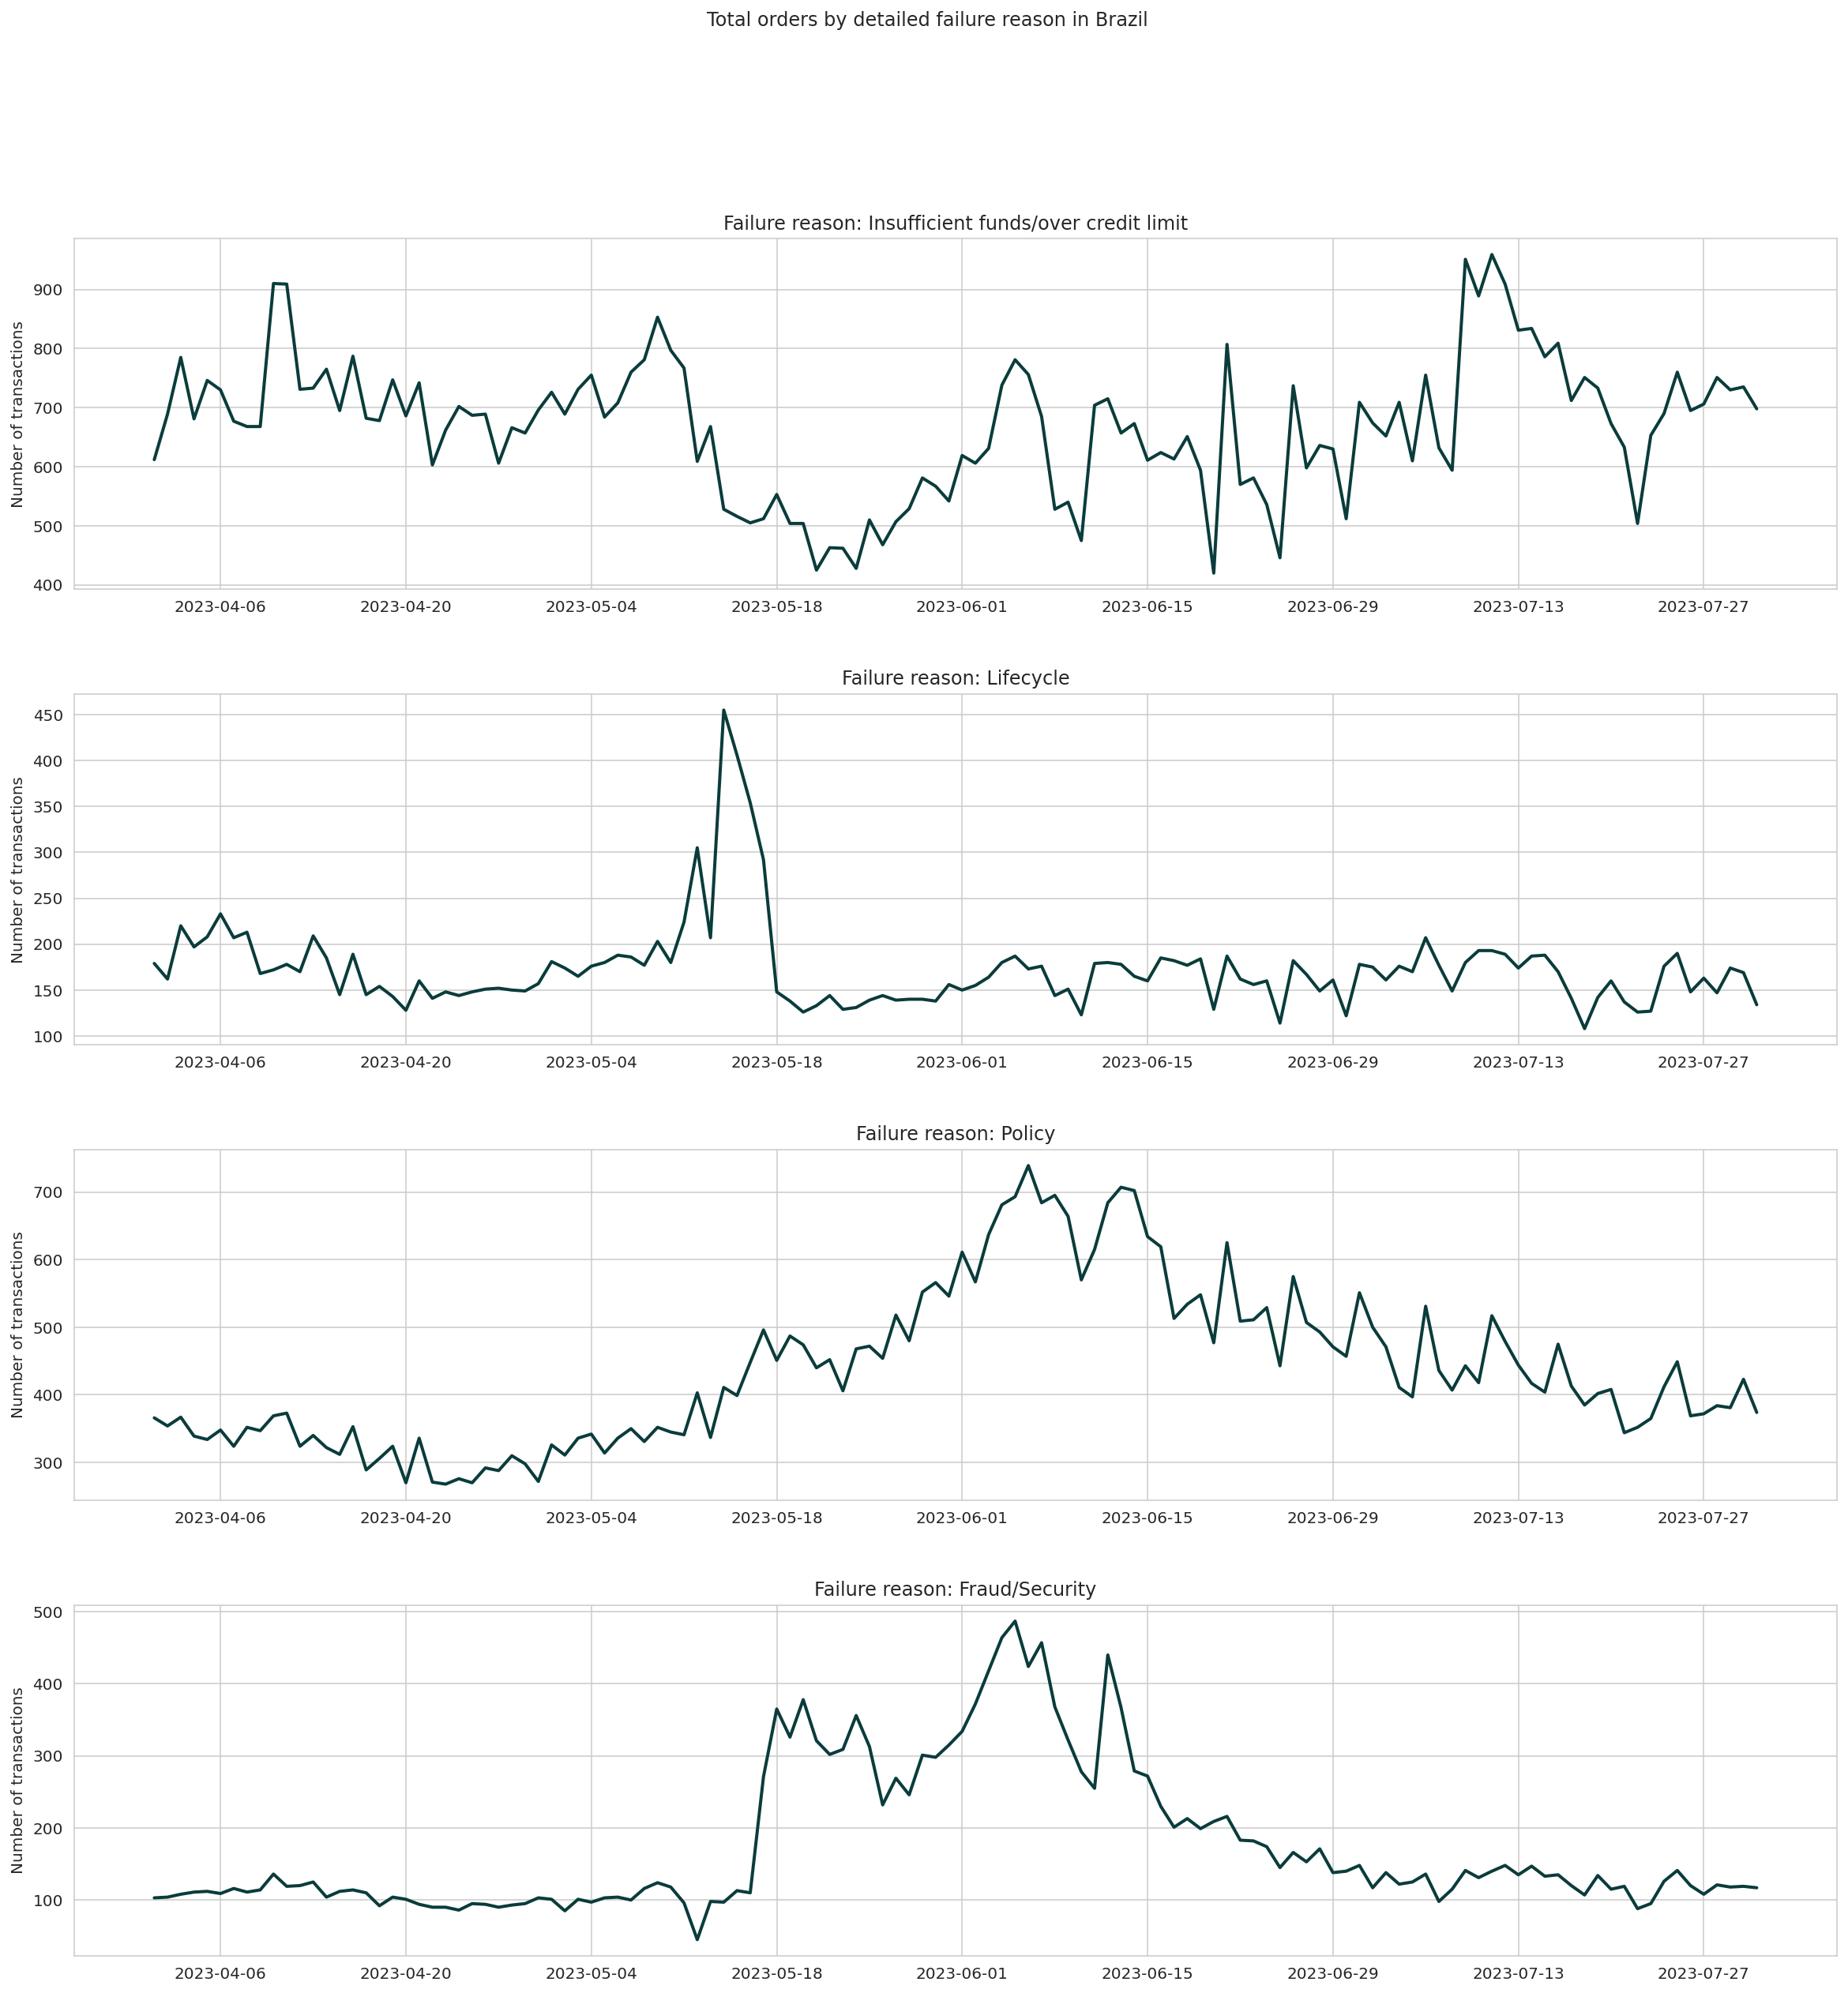

In [45]:
#apply function for charts
figure_size(20, 20)

#create list of columns to iterate over
column_list_details = ['Insufficient funds/over credit limit', 'Lifecycle', 'Policy', 'Fraud/Security']

for i, column in enumerate(column_list_details, start = 1):
    ax = plt.subplot(4, 1, i)
    
    plt.plot(detailed_small_grouped_pivot['PAYMENT_DATE'], 
             detailed_small_grouped_pivot[column], color = '#0A3C3B', linewidth = 2)
    
    #change y axis format
    ax.yaxis.set_major_formatter(tcr.StrMethodFormatter('{x:,.0f}'))
    
    #set frequency of dates on x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
    #add labels
    ax.tick_params(axis = 'x', labelrotation = None)
    ax.set_ylabel('Number of transactions')
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    #set global heading for charts
    plt.suptitle('Total orders by detailed failure reason in Brazil')
    ax.set_title('Failure reason: ' + column)

# Fraudulent Transactions

In [46]:
#find fraud transactions in overall failed transactions
fraud_payments = failed_payments[failed_payments['DETAILED_REFUSAL_REASON'] == '83 : Fraud/Security']

In [47]:
#find total fraud transactions per day
fraud_count = fraud_payments.groupby('PAYMENT_DATE')['ORDER_ID'].count().reset_index()

#find total failed payments per day
failed_count = failed_payments.groupby('PAYMENT_DATE')['ORDER_ID'].count().reset_index()

#merge tables together
fraud_share = failed_count.merge(fraud_count, on = 'PAYMENT_DATE', how = 'left').rename(columns = \
                                                                  {'ORDER_ID_x': 'Total failed transactions',
                                                                    'ORDER_ID_y': 'Fraudulant transactions'})

#add column to calculate % share
fraud_share['Fraud share'] = fraud_share['Fraudulant transactions'] / \
fraud_share['Total failed transactions'] * 100

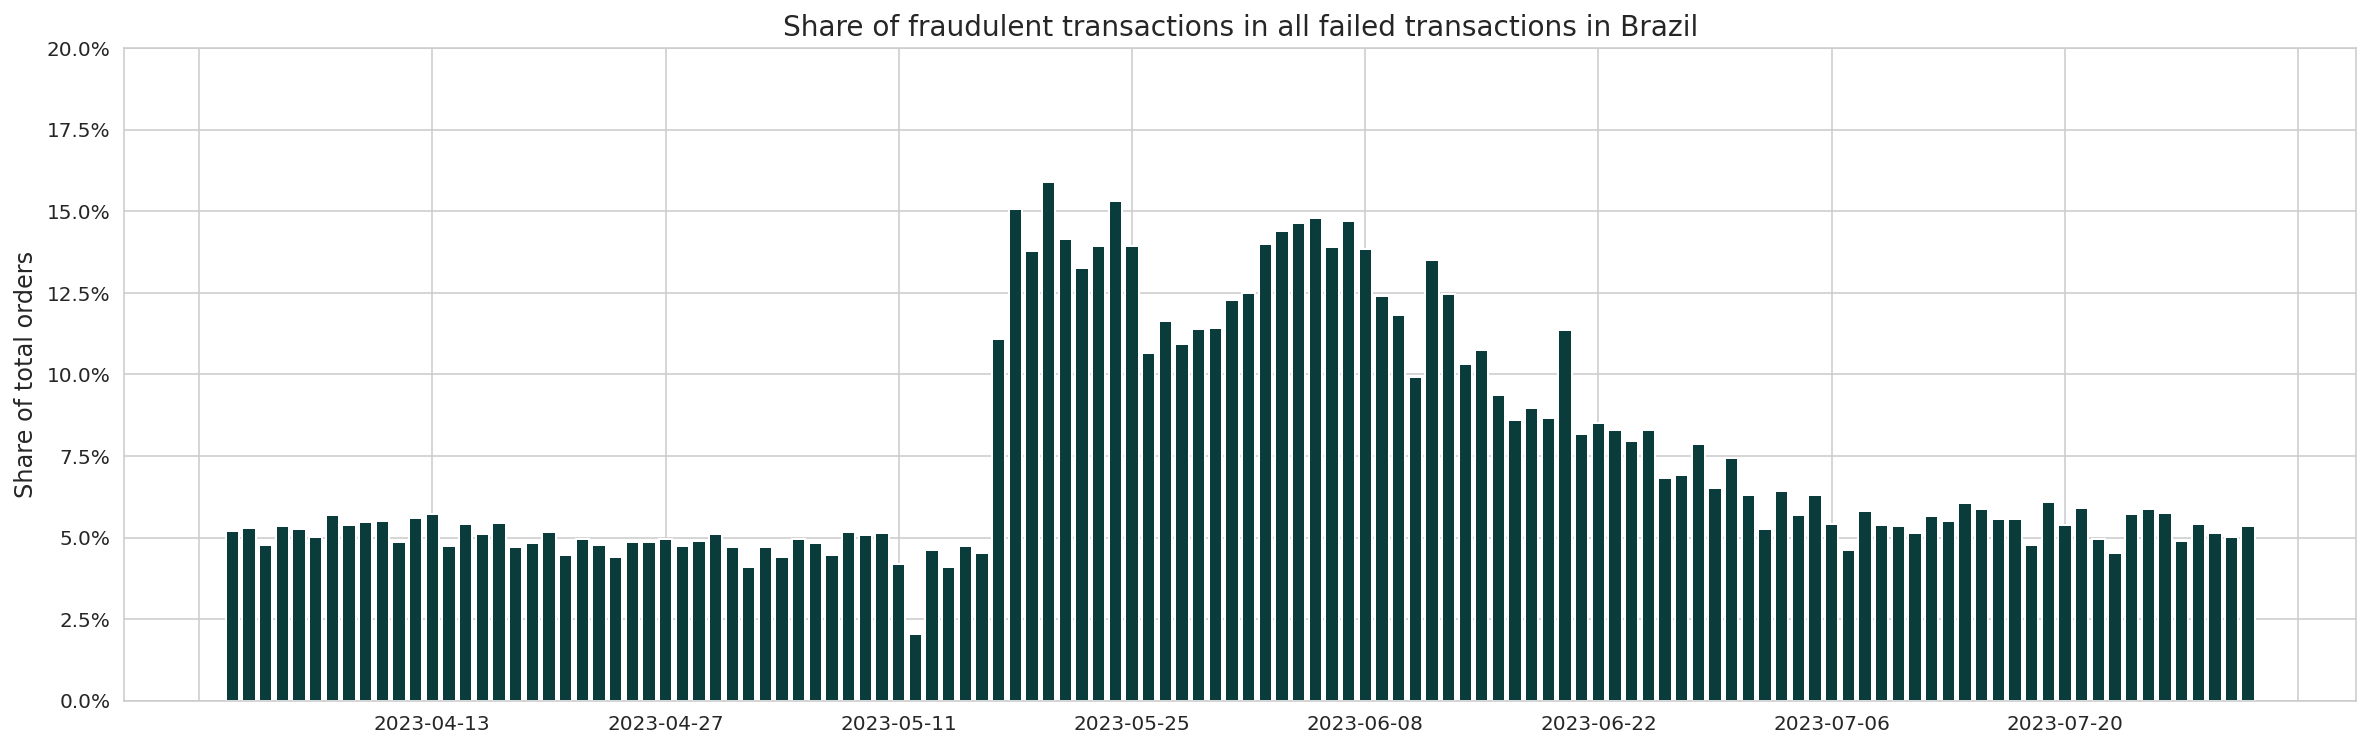

In [48]:
#apply functions for chart
figure_size(20, 6)

ax = plt.subplot(1, 1, 1)
    
#plot bars
plt.bar(fraud_share['PAYMENT_DATE'], fraud_share['Fraud share'],  color = '#0A3C3B')
   
#change axis format
ax.yaxis.set_major_formatter(tcr.PercentFormatter(xmax = 100))

ax.set_ylim(0, 20)
    
#set frequency of dates on x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
#add labels
ax.tick_params(axis = 'x', labelrotation = None)
ax.set_ylabel('Share of total orders', fontsize = 12)
ax.set_title('Share of fraudulent transactions in all failed transactions in Brazil', fontsize = 14)

plt.show()

In [49]:
#find banks where fraud is happening
fraud_banks = fraud_payments.groupby('CARD_ISSUING_BANK').agg({'ORDER_ID': ['count', 'nunique']}).reset_index()

In [50]:
#majority of fraud transactions are hppening through BANCO COOPERATIVO SICOOB S.A., BANCO INTER S.A.,
#ITAU UNIBANCO S.A. and NU PAGAMENTOS SA
#create dataframe with just these banks
banks = fraud_payments[(fraud_payments['CARD_ISSUING_BANK'] == 'BANCO COOPERATIVO SICOOB S.A.') | \
                      (fraud_payments['CARD_ISSUING_BANK'] == 'BANCO INTER S.A.') | \
                      (fraud_payments['CARD_ISSUING_BANK'] == 'ITAU UNIBANCO S.A.') | \
                      (fraud_payments['CARD_ISSUING_BANK'] == 'NU PAGAMENTOS SA')]

In [51]:
#plot daily fraud transactions for these banks
bank_daily_fraud = banks.groupby(['PAYMENT_DATE', 'CARD_ISSUING_BANK']).agg({'ORDER_ID': ['count', 'nunique']}).reset_index()

#get columns titles on one line
bank_daily_fraud.columns = bank_daily_fraud.columns.map(' | '.join).str.strip(' | ')

#pivot data for charts
bank_daily_fraud_pivot = bank_daily_fraud.pivot_table(columns = 'CARD_ISSUING_BANK',
                                                     index = 'PAYMENT_DATE',
                                                     values = 'ORDER_ID | count').\
reset_index().rename_axis(None, axis = 1)

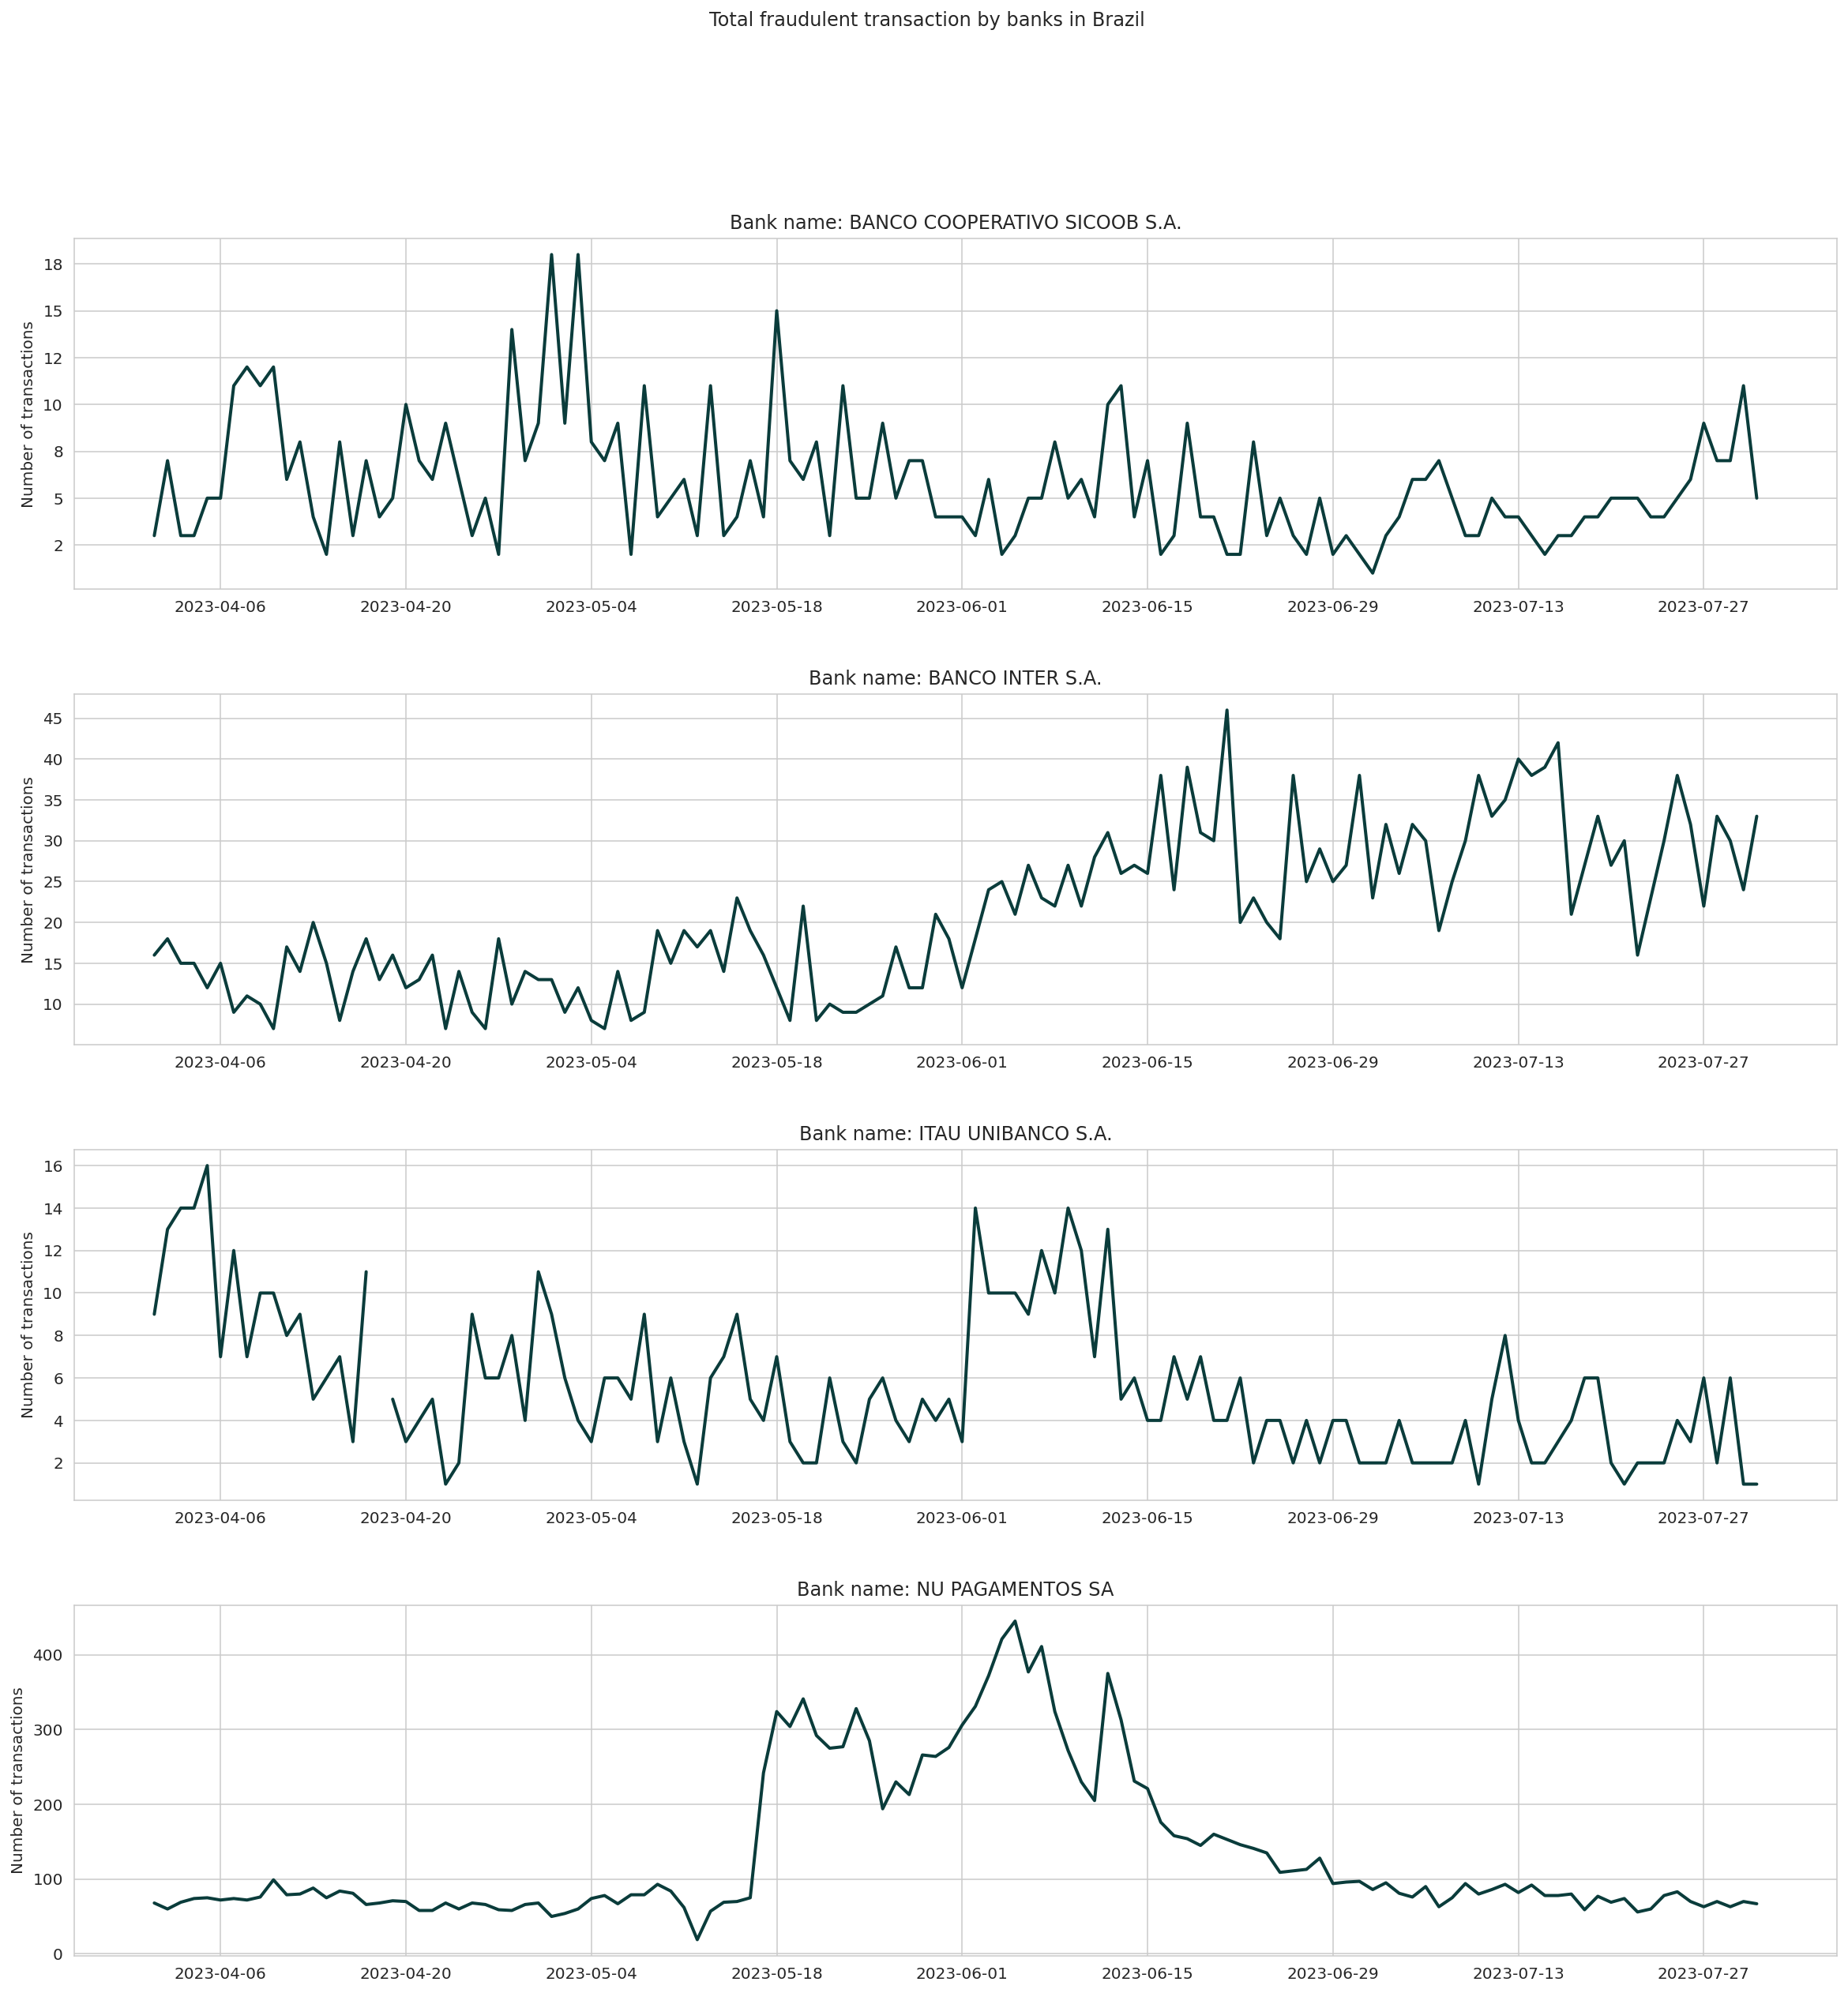

In [52]:
#apply function for charts
figure_size(20, 20)

#create list of columns to iterate over
column_list_banks = ['BANCO COOPERATIVO SICOOB S.A.', 'BANCO INTER S.A.', 'ITAU UNIBANCO S.A.', 
                     'NU PAGAMENTOS SA']

for i, column in enumerate(column_list_banks, start = 1):
    ax = plt.subplot(4, 1, i)
    
    plt.plot(bank_daily_fraud_pivot['PAYMENT_DATE'], 
             bank_daily_fraud_pivot[column], color = '#0A3C3B', linewidth = 2)
    
    #change y axis format
    ax.yaxis.set_major_formatter(tcr.StrMethodFormatter('{x:,.0f}'))
    
    #set frequency of dates on x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
    #add labels
    ax.tick_params(axis = 'x', labelrotation = None)
    ax.set_ylabel('Number of transactions')
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    #set global heading for charts
    plt.suptitle('Total fraudulent transaction by banks in Brazil')
    ax.set_title('Bank name: ' + column)

# Total Orders

In [54]:
#look at total orders to see if these increased during the period
orders = payments.groupby('PAYMENT_DATE').agg({'ORDER_ID': ['count', 'nunique']}).reset_index()

#get columns titles on one line
orders.columns = orders.columns.map(' | '.join).str.strip(' | ')

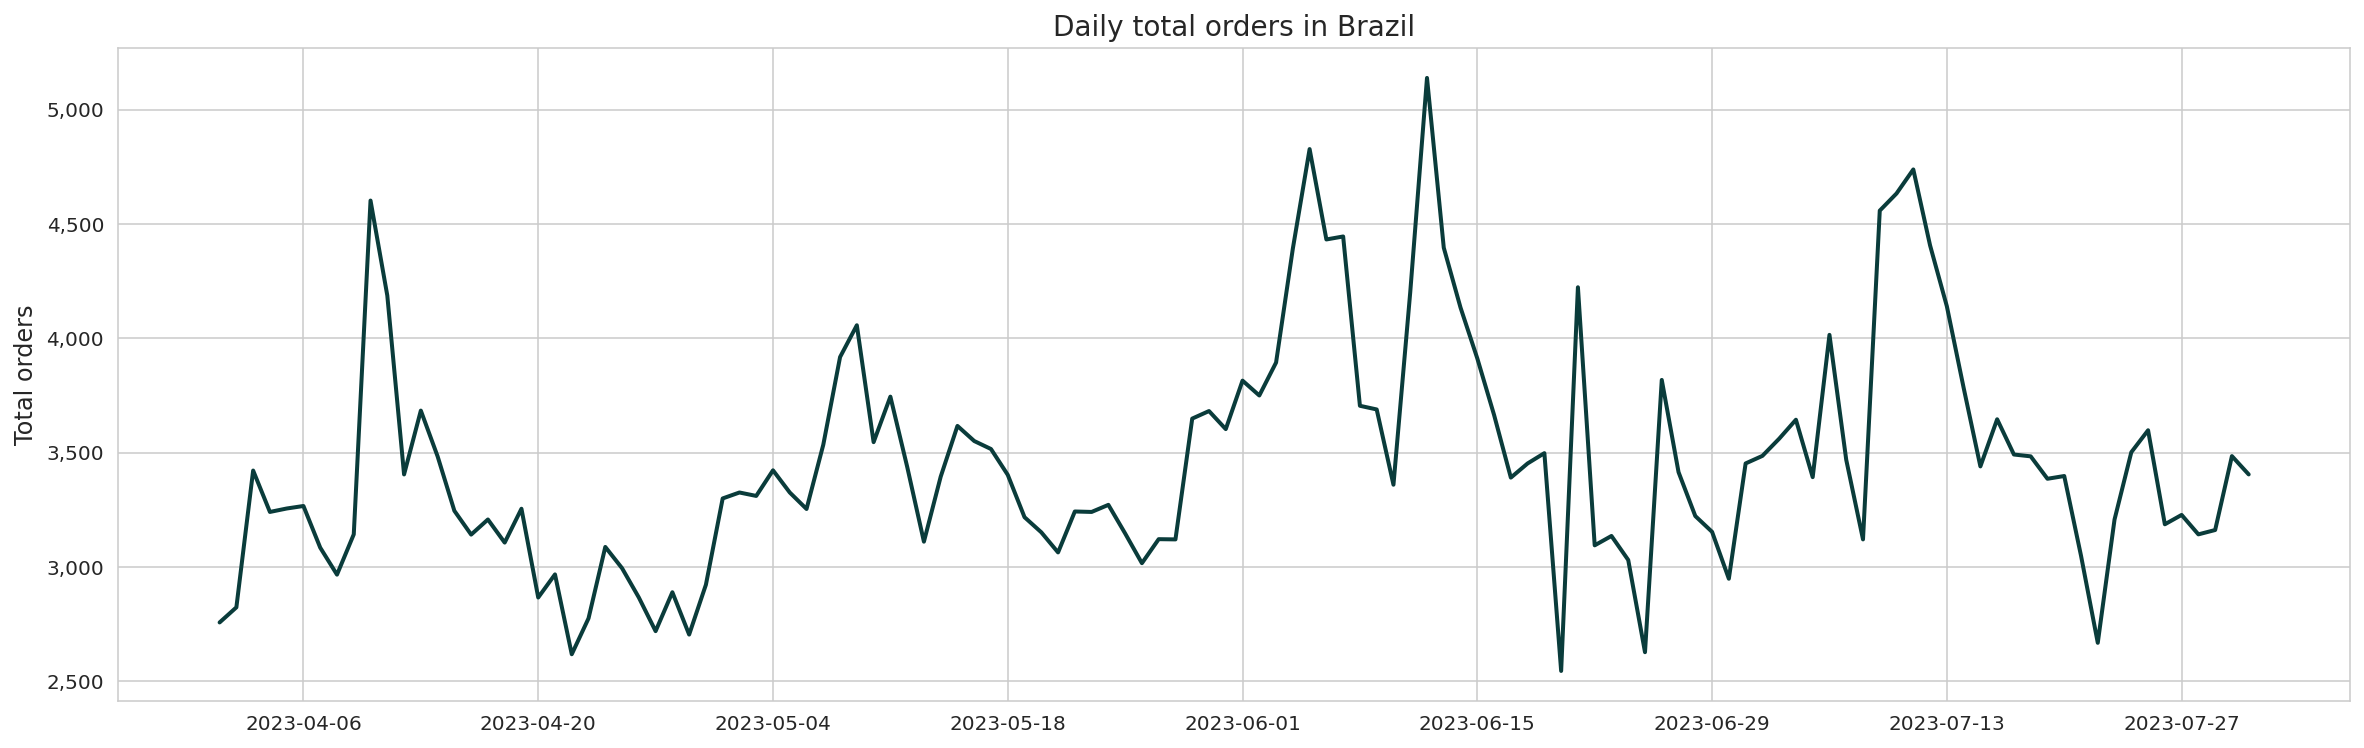

In [56]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), orders['PAYMENT_DATE'], orders['ORDER_ID | count'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Total orders', 'Daily total orders in Brazil')

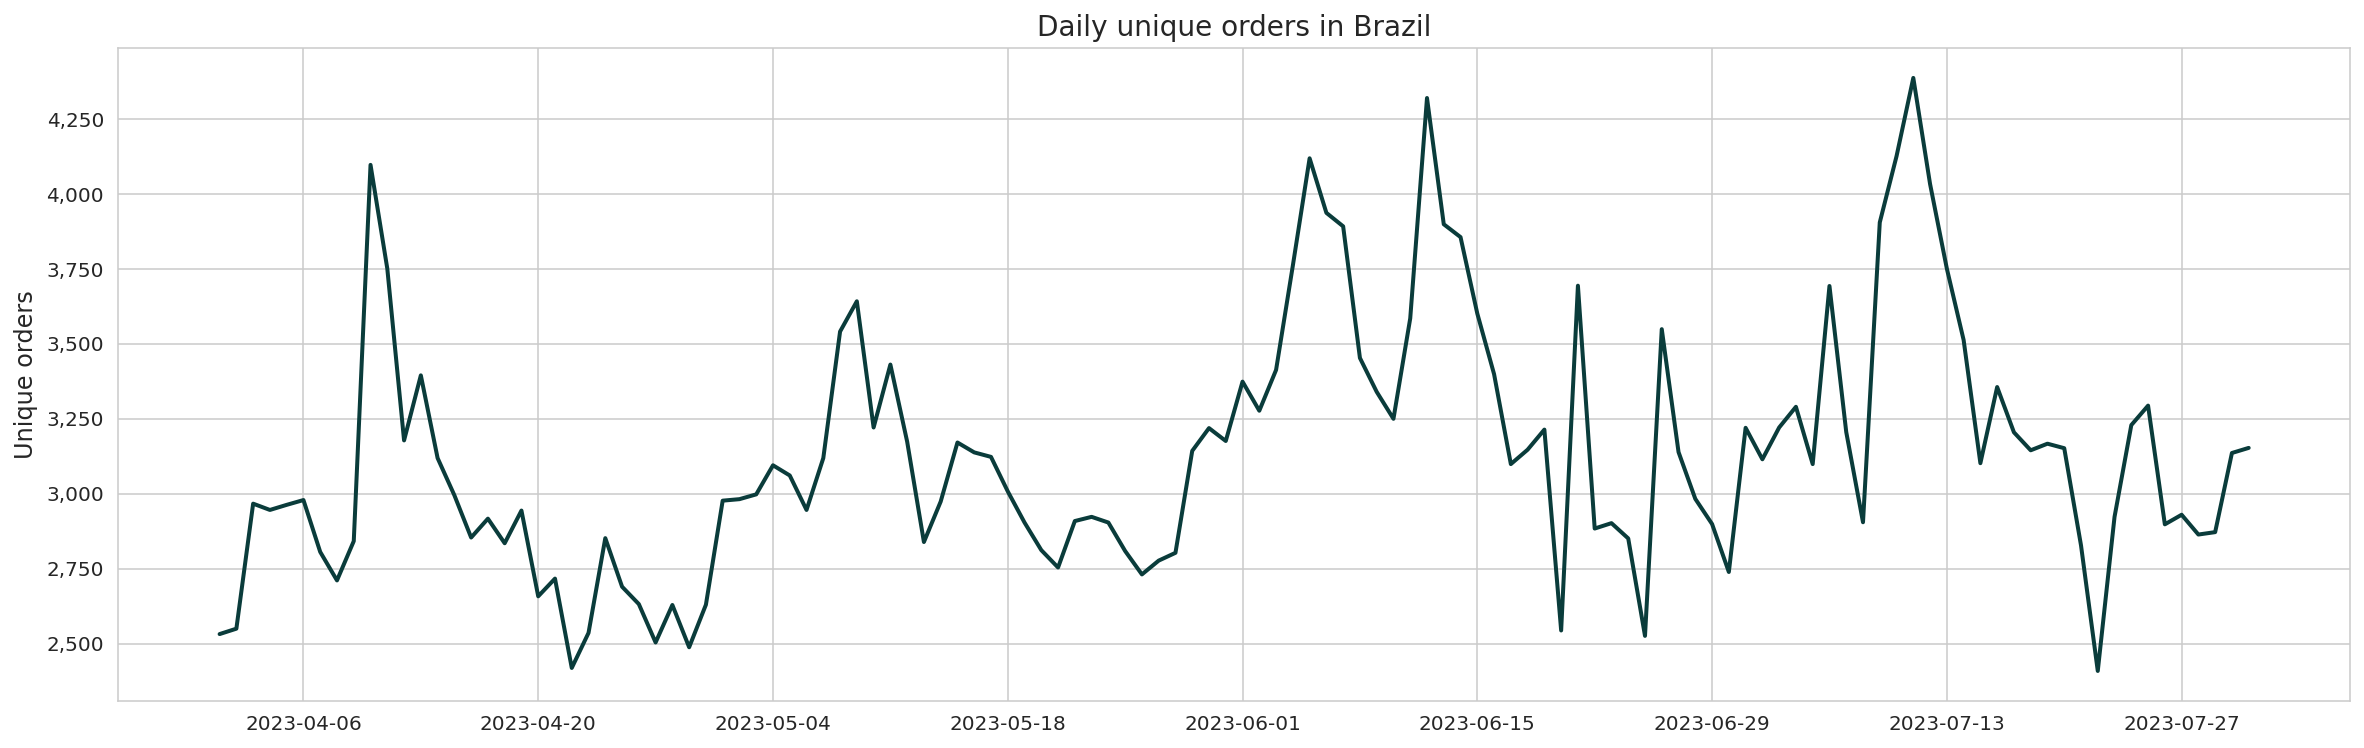

In [57]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), orders['PAYMENT_DATE'], orders['ORDER_ID | nunique'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Unique orders', 'Daily unique orders in Brazil')

# Final Charts

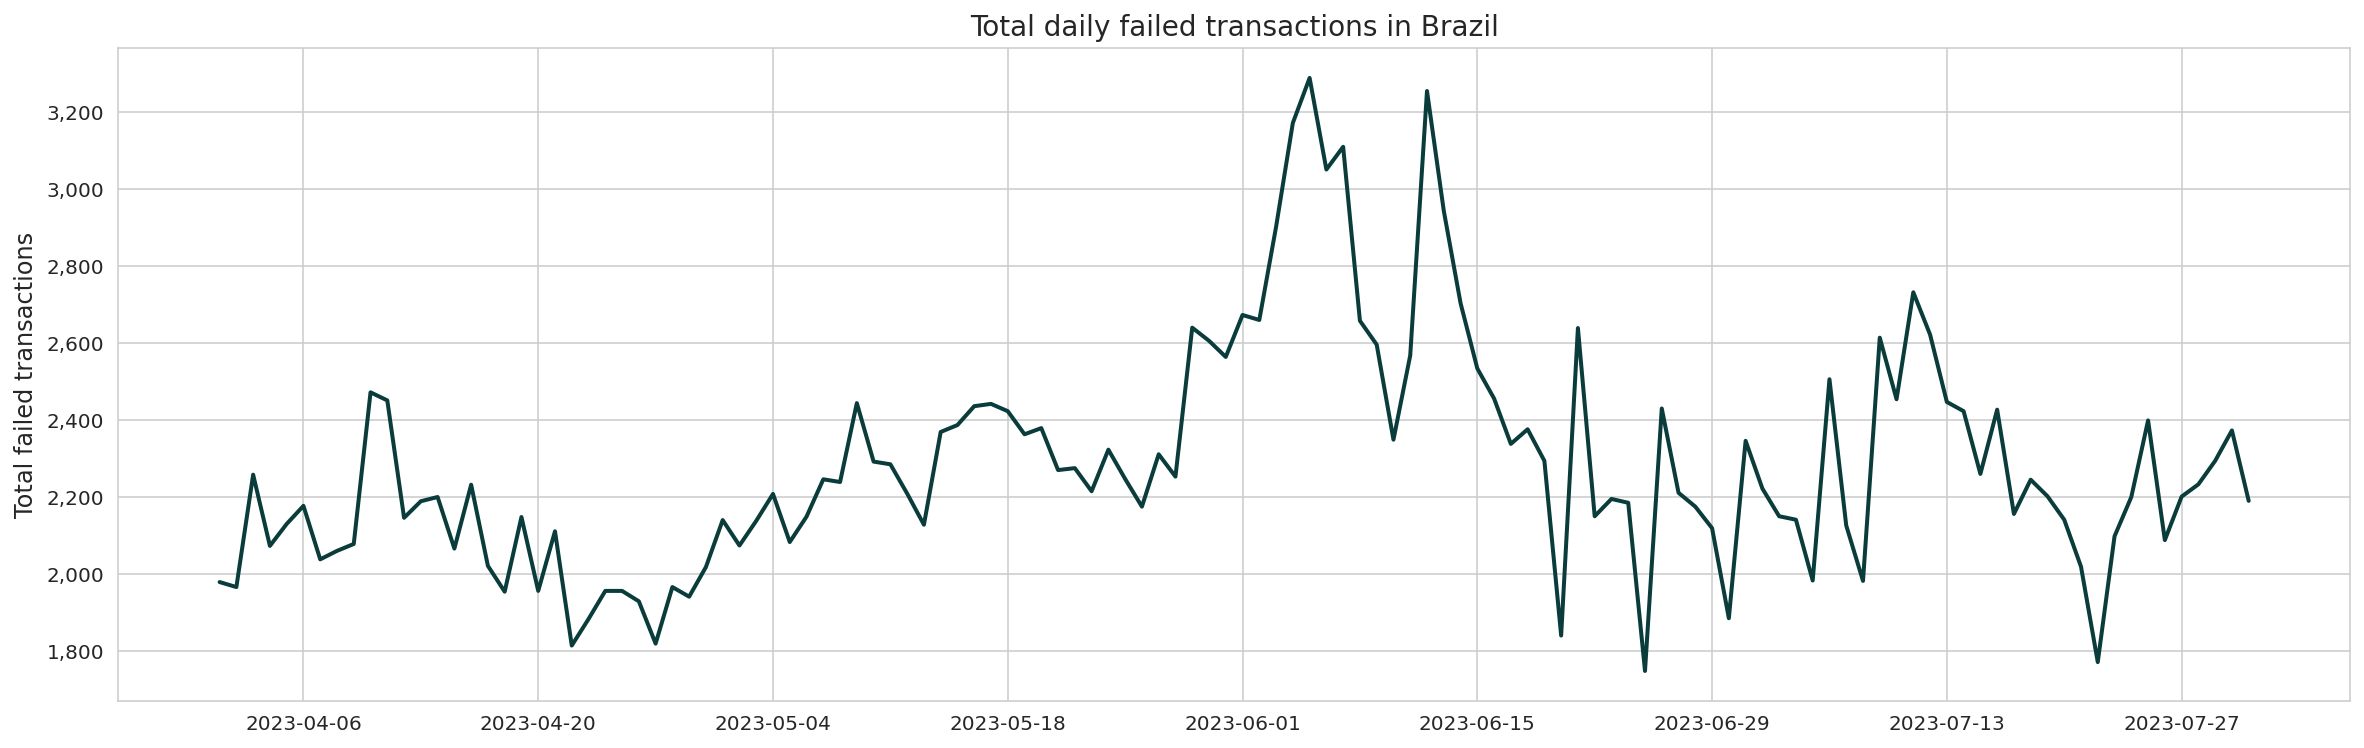

In [83]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), failed_payments_daily['PAYMENT_DATE'], failed_payments_daily['ORDER_ID | count'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Total failed transactions', 'Total daily failed transactions in Brazil')

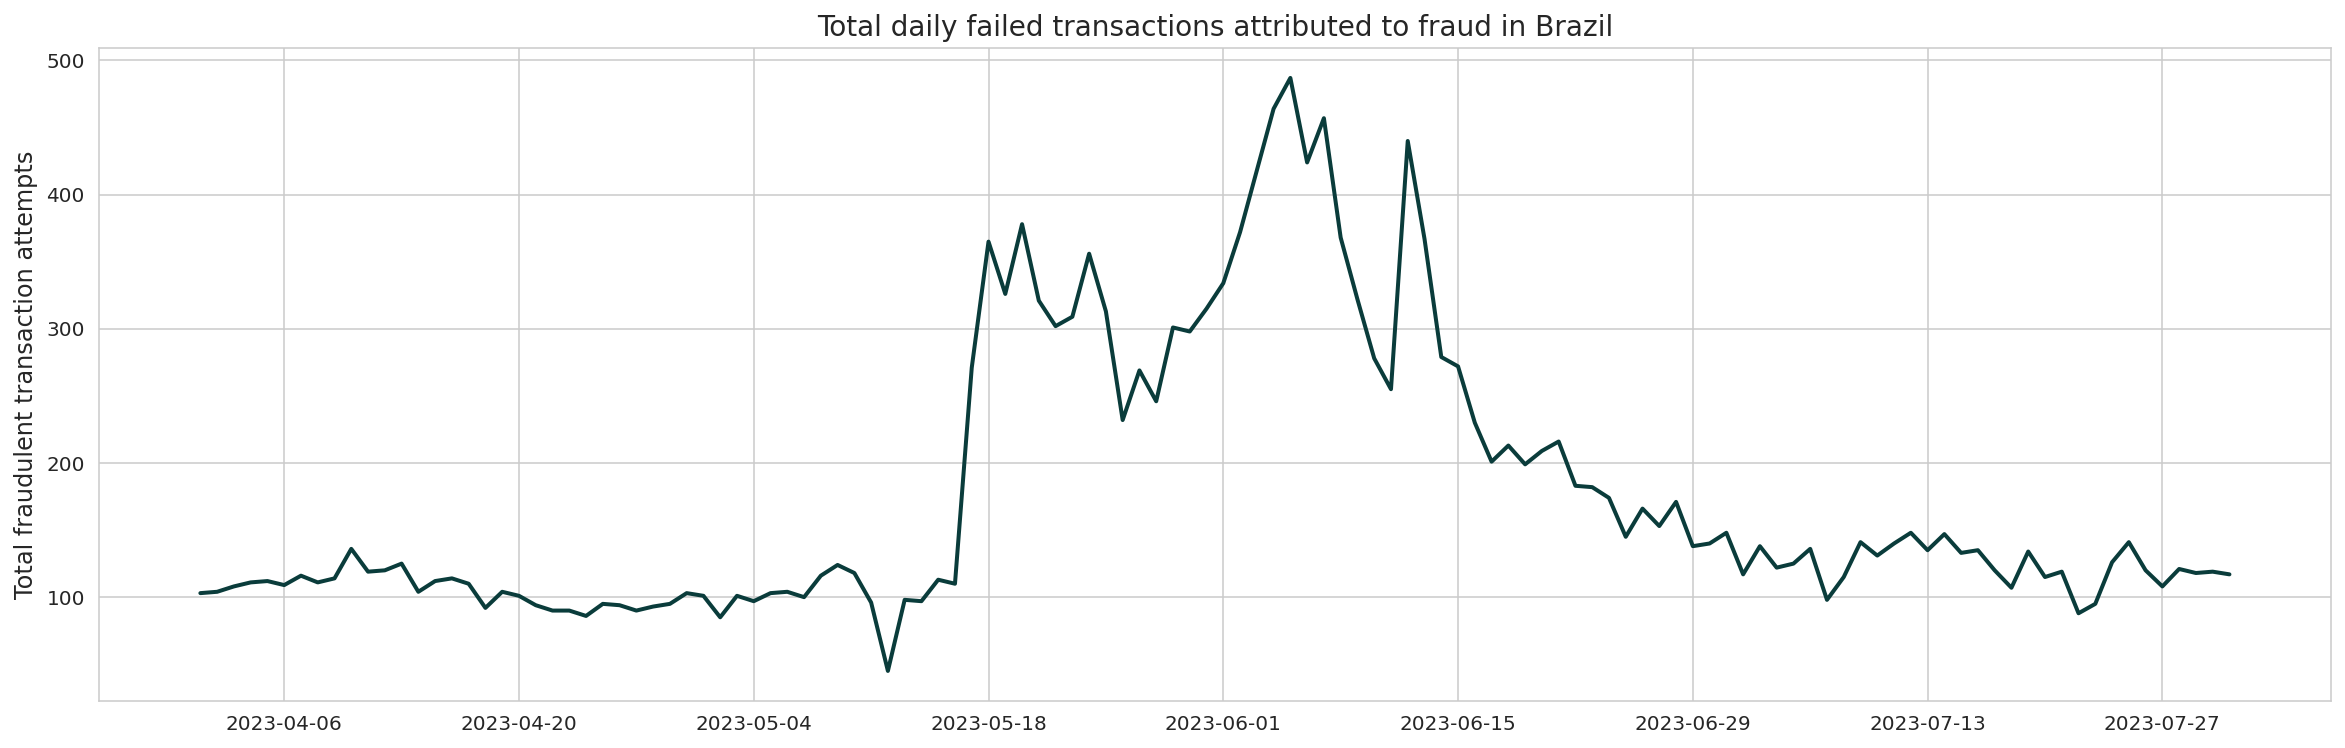

In [84]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), detailed_small_grouped_pivot['PAYMENT_DATE'], detailed_small_grouped_pivot['Fraud/Security'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Total fraudulent transaction attempts', 
           'Total daily failed transactions attributed to fraud in Brazil')

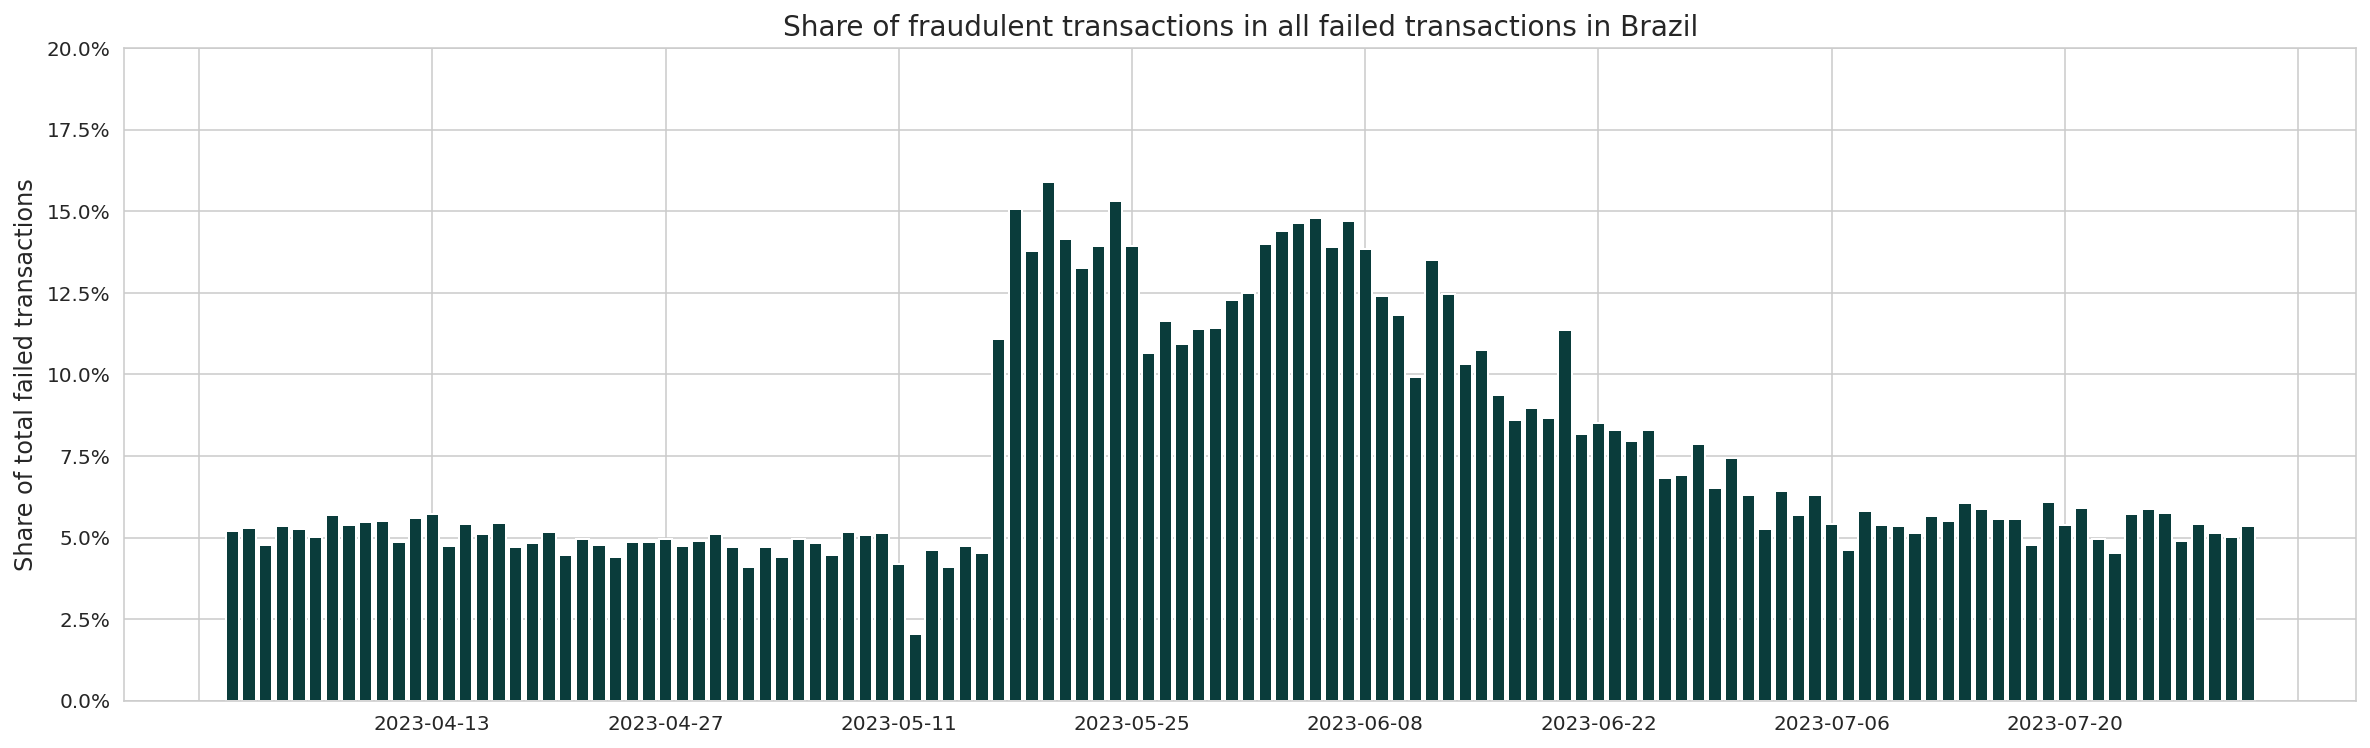

In [85]:
#apply functions for chart
figure_size(20, 6)

ax = plt.subplot(1, 1, 1)
    
#plot bars
plt.bar(fraud_share['PAYMENT_DATE'], fraud_share['Fraud share'],  color = '#0A3C3B')
   
#change axis format
ax.yaxis.set_major_formatter(tcr.PercentFormatter(xmax = 100))

ax.set_ylim(0, 20)
    
#set frequency of dates on x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
#add labels
ax.tick_params(axis = 'x', labelrotation = None)
ax.set_ylabel('Share of total failed transactions', fontsize = 12)
ax.set_title('Share of fraudulent transactions in all failed transactions in Brazil', fontsize = 14)

plt.show()

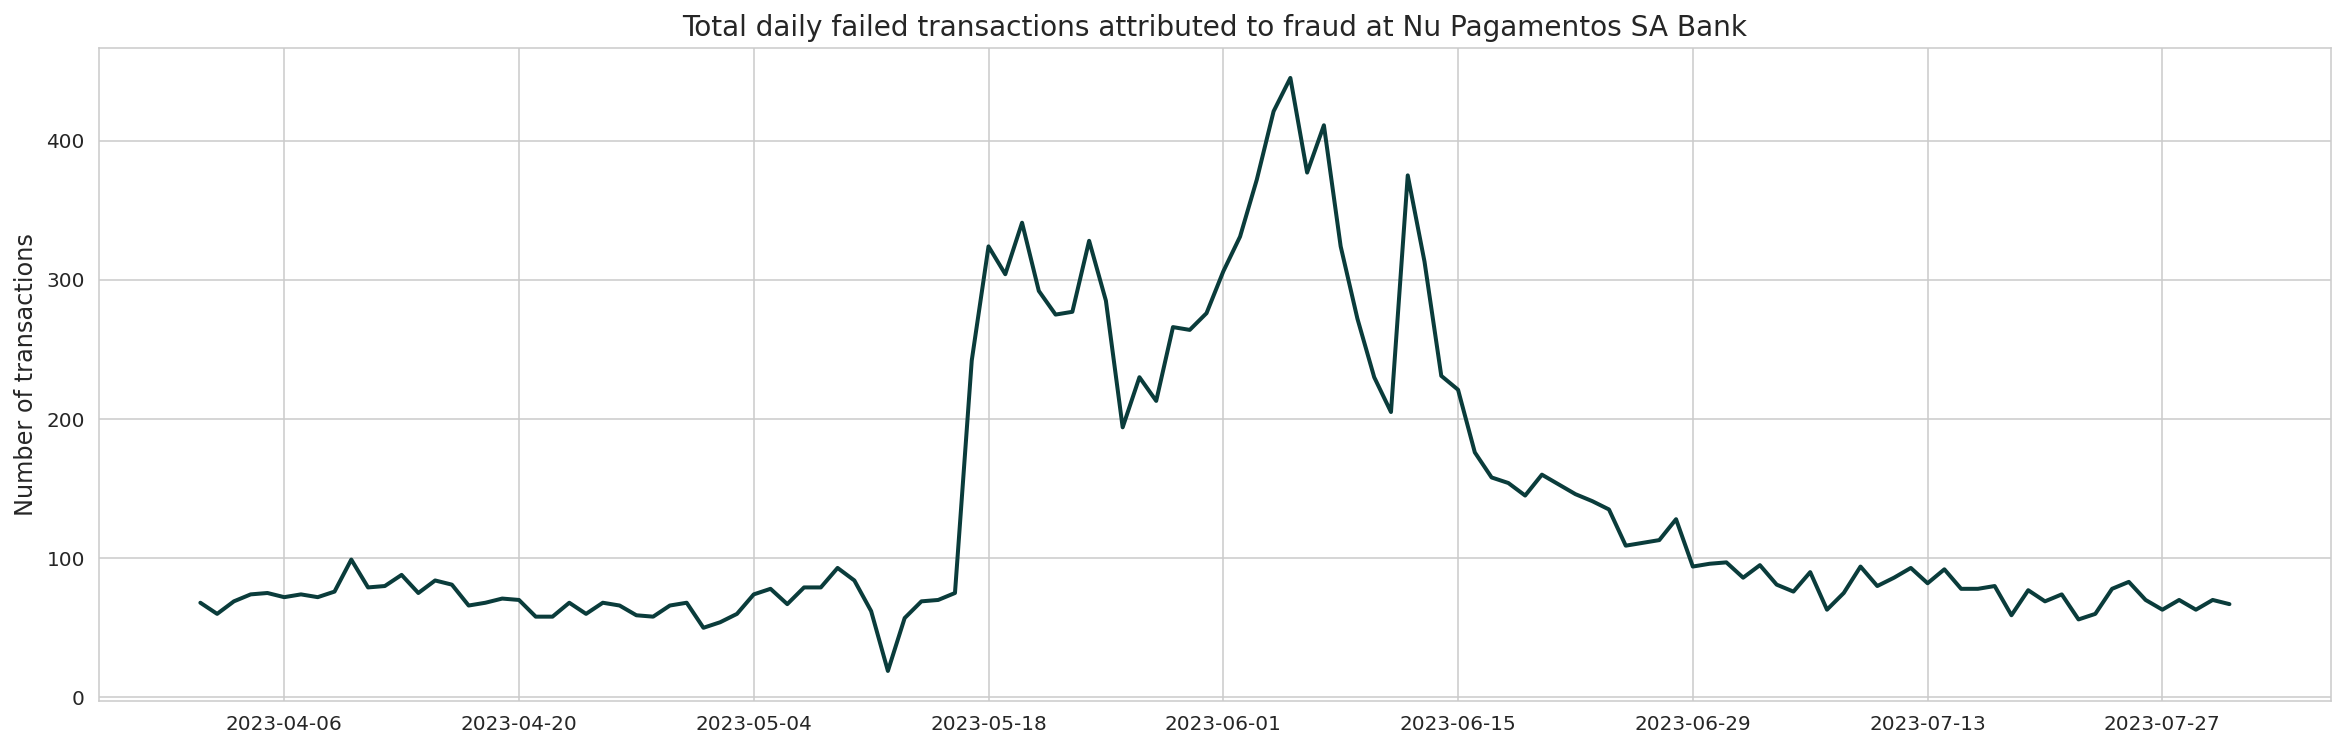

In [65]:
#apply functions for chart
figure_size(20, 6)

line_chart((111), bank_daily_fraud_pivot['PAYMENT_DATE'], bank_daily_fraud_pivot['NU PAGAMENTOS SA'], 
           tcr.StrMethodFormatter('{x:,.0f}'), None, 'Number of transactions', 
           'Total daily failed transactions attributed to fraud at Nu Pagamentos SA Bank')

In [78]:
#find share of fraud transactions at Nu pagamentos Bank
nu_pagamentos = fraud_payments[fraud_payments['CARD_ISSUING_BANK'] == 'NU PAGAMENTOS SA']
nu_pagamentos_fraud = nu_pagamentos.groupby('PAYMENT_DATE')['ORDER_ID'].count().reset_index()

#total fraud transactions (as defined above)
fraud_count = fraud_payments.groupby('PAYMENT_DATE')['ORDER_ID'].count().reset_index()

#merge tables together
np_fraud_share = fraud_count.merge(nu_pagamentos_fraud, on = 'PAYMENT_DATE', how = 'left').rename(columns = \
                                        {'ORDER_ID_x': 'Total fraudulant transactions',
                                         'ORDER_ID_y': 'Fraudulant transactions at Nu Pagamentos SA Bank'})

#add column to calculate % share
np_fraud_share['Fraud share'] = np_fraud_share['Fraudulant transactions at Nu Pagamentos SA Bank'] / \
np_fraud_share['Total fraudulant transactions'] * 100

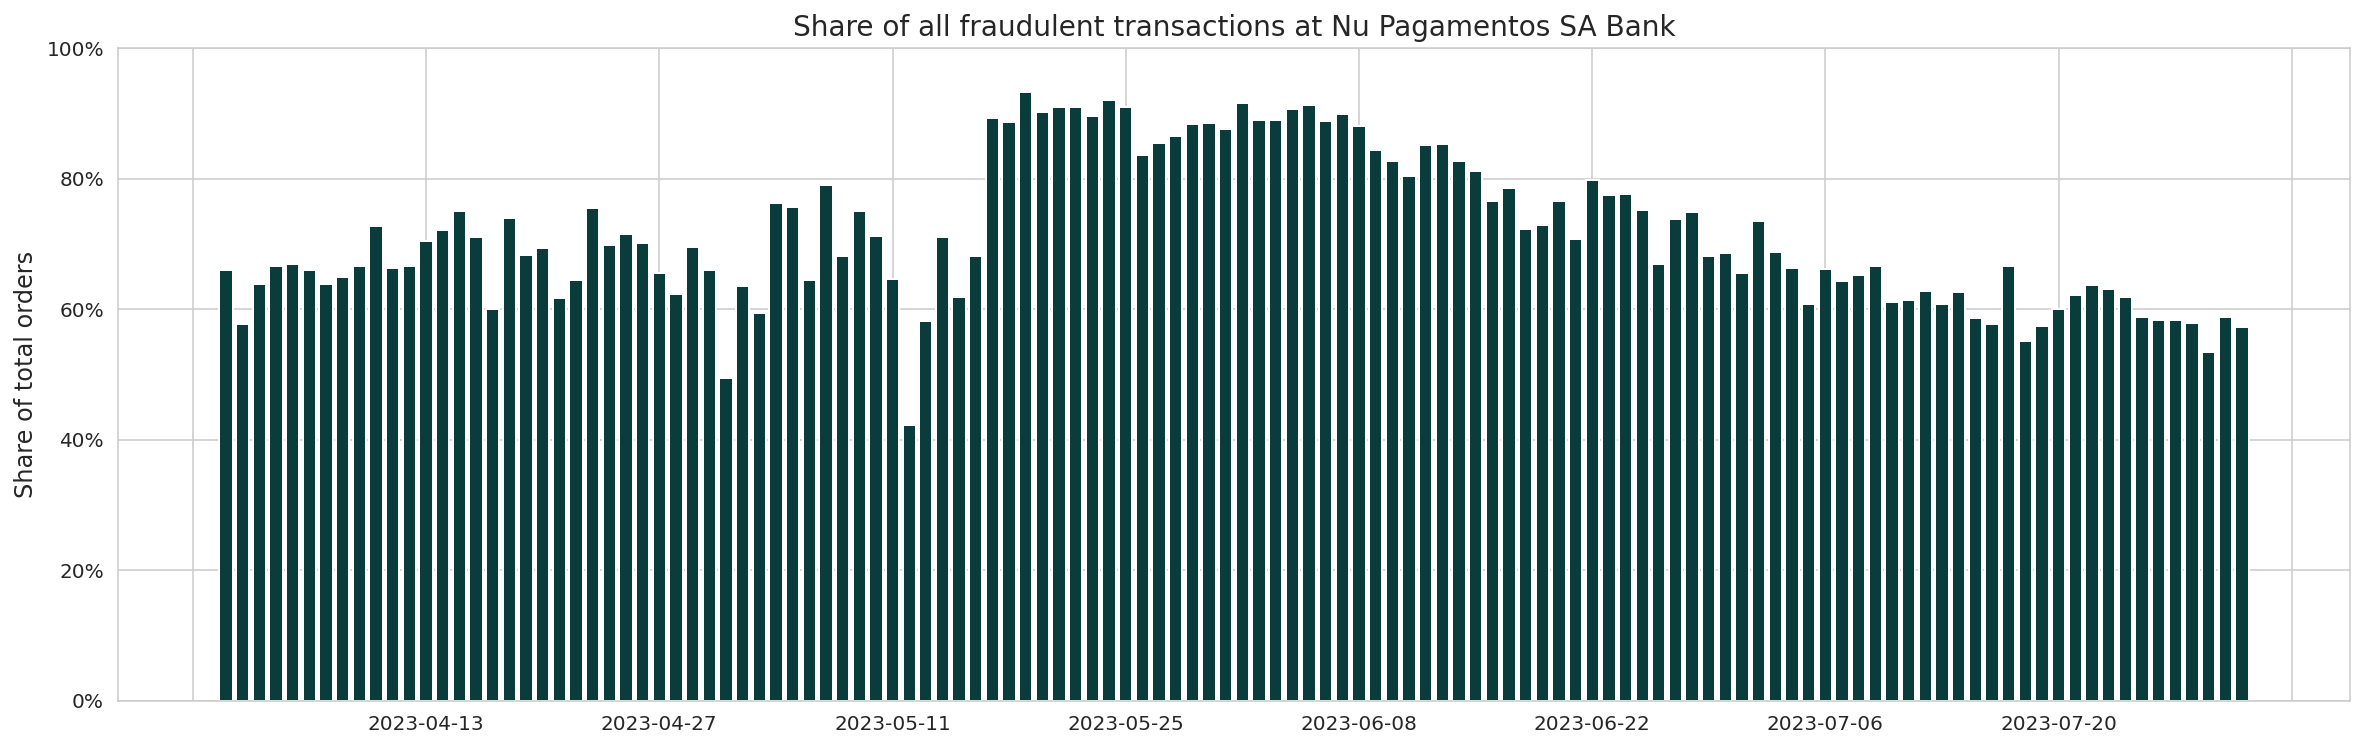

In [82]:
#apply functions for chart
figure_size(20, 6)

ax = plt.subplot(1, 1, 1)
    
#plot bars
plt.bar(np_fraud_share['PAYMENT_DATE'], np_fraud_share['Fraud share'],  color = '#0A3C3B')
   
#change axis format
ax.yaxis.set_major_formatter(tcr.PercentFormatter(xmax = 100))

ax.set_ylim(0, 100)
    
#set frequency of dates on x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 2, tz = None))
    
#add labels
ax.tick_params(axis = 'x', labelrotation = None)
ax.set_ylabel('Share of total orders', fontsize = 12)
ax.set_title('Share of all fraudulent transactions at Nu Pagamentos SA Bank', fontsize = 14)

plt.show()

In [ ]:
#hex
#B2BEA6